In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../Data/Initial_Data.csv')



# Preprocessing Data

## Solve Number of Count And Number of Loans

Fill Short Term Count Bank - Mid Term Count Bank - Long Term Count Bank - number loan bank


In [138]:
df['Difference'] = df['SHORT_TERM_COUNT_BANK'] + df['MID_TERM_COUNT_BANK'] + df['LONG_TERM_COUNT_BANK'] - df['NUMBER_OF_LOANS_BANK']
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)


Số lượng các giá trị khác biệt duy nhất: 2
Difference
2.0    13136
NaN     6864
Name: count, dtype: int64


In [139]:
df['NUMBER_OF_LOANS_BANK'] = df['NUMBER_OF_LOANS_BANK'] + 2

df.loc[(df['SHORT_TERM_COUNT_BANK'].isnull()) & (df['MID_TERM_COUNT_BANK'].notnull()) & (df['LONG_TERM_COUNT_BANK'].notnull()) & (df['NUMBER_OF_LOANS_BANK'].notnull()), 'SHORT_TERM_COUNT_BANK'] = df['NUMBER_OF_LOANS_BANK'] - df['MID_TERM_COUNT_BANK'] - df['LONG_TERM_COUNT_BANK']

df.loc[(df['MID_TERM_COUNT_BANK'].isnull()) & (df['SHORT_TERM_COUNT_BANK'].notnull()) & (df['LONG_TERM_COUNT_BANK'].notnull()) & (df['NUMBER_OF_LOANS_BANK'].notnull()), 'MID_TERM_COUNT_BANK'] = df['NUMBER_OF_LOANS_BANK'] - df['SHORT_TERM_COUNT_BANK'] - df['LONG_TERM_COUNT_BANK']

df.loc[(df['LONG_TERM_COUNT_BANK'].isnull()) & (df['SHORT_TERM_COUNT_BANK'].notnull()) & (df['MID_TERM_COUNT_BANK'].notnull()) & (df['NUMBER_OF_LOANS_BANK'].notnull()), 'LONG_TERM_COUNT_BANK'] = df['NUMBER_OF_LOANS_BANK'] - df['SHORT_TERM_COUNT_BANK'] - df['MID_TERM_COUNT_BANK']

df.loc[(df['NUMBER_OF_LOANS_BANK'].isnull()) & (df['SHORT_TERM_COUNT_BANK'].notnull()) & (df['MID_TERM_COUNT_BANK'].notnull()) & (df['LONG_TERM_COUNT_BANK'].notnull()), 'NUMBER_OF_LOANS_BANK'] = df['SHORT_TERM_COUNT_BANK'] + df['MID_TERM_COUNT_BANK'] + df['LONG_TERM_COUNT_BANK']

df[['SHORT_TERM_COUNT_BANK','MID_TERM_COUNT_BANK','LONG_TERM_COUNT_BANK','NUMBER_OF_LOANS_BANK']] 

,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,NUMBER_OF_LOANS_BANK
0,1.0,1.0,1.0,3.0
1,7.0,1.0,1.0,9.0
2,7.0,4.0,1.0,12.0
3,NaN,1.0,NaN,3.0
4,1.0,1.0,1.0,3.0
...,...,...,...,...
19995,4.0,1.0,1.0,6.0
19996,1.0,1.0,1.0,3.0
19997,4.0,1.0,1.0,6.0
19998,10.0,1.0,1.0,12.0


Fill Short Term Count non Bank - Mid Term Count non Bank - Long Term Count non Bank - number loan non bank

In [140]:
df['Difference'] = df['SHORT_TERM_COUNT_NON_BANK'] + df['MID_TERM_COUNT_NON_BANK'] + df['LONG_TERM_COUNT_NON_BANK'] - (df['NUMBER_OF_LOANS_NON_BANK'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
2.0    13115
NaN     6885
Name: count, dtype: int64


In [141]:
df['NUMBER_OF_LOANS_NON_BANK'] = df['NUMBER_OF_LOANS_NON_BANK'] + 2

df.loc[(df['SHORT_TERM_COUNT_NON_BANK'].isnull()) & (df['MID_TERM_COUNT_NON_BANK'].notnull()) & (df['LONG_TERM_COUNT_NON_BANK'].notnull())& (df['NUMBER_OF_LOANS_NON_BANK'].notnull()), 'SHORT_TERM_COUNT_NON_BANK'] = df['NUMBER_OF_LOANS_NON_BANK'] - df['MID_TERM_COUNT_NON_BANK'] - df['LONG_TERM_COUNT_NON_BANK']

df.loc[(df['MID_TERM_COUNT_NON_BANK'].isnull()) & (df['SHORT_TERM_COUNT_NON_BANK'].notnull()) & (df['LONG_TERM_COUNT_NON_BANK'].notnull()) & (df['NUMBER_OF_LOANS_NON_BANK'].notnull()), 'MID_TERM_COUNT_NON_BANK'] = df['NUMBER_OF_LOANS_NON_BANK'] - df['SHORT_TERM_COUNT_NON_BANK'] - df['LONG_TERM_COUNT_NON_BANK']


df.loc[(df['LONG_TERM_COUNT_NON_BANK'].isnull()) & (df['SHORT_TERM_COUNT_NON_BANK'].notnull()) & (df['MID_TERM_COUNT_NON_BANK'].notnull()) & (df['NUMBER_OF_LOANS_NON_BANK'].notnull()), 'LONG_TERM_COUNT_NON_BANK'] = df['NUMBER_OF_LOANS_NON_BANK'] - df['SHORT_TERM_COUNT_NON_BANK'] - df['MID_TERM_COUNT_NON_BANK']

df.loc[(df['NUMBER_OF_LOANS_NON_BANK'].isnull()) & (df['SHORT_TERM_COUNT_NON_BANK'].notnull()) & (df['MID_TERM_COUNT_NON_BANK'].notnull()) & (df['LONG_TERM_COUNT_NON_BANK'].notnull()), 'NUMBER_OF_LOANS_NON_BANK'] = df['SHORT_TERM_COUNT_NON_BANK'] + df['MID_TERM_COUNT_NON_BANK'] + df['LONG_TERM_COUNT_NON_BANK']

df[['SHORT_TERM_COUNT_NON_BANK','MID_TERM_COUNT_NON_BANK','LONG_TERM_COUNT_NON_BANK','NUMBER_OF_LOANS_NON_BANK']] 

,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS_NON_BANK
0,1.0,1.0,1.0,3.0
1,4.0,NaN,NaN,6.0
2,1.0,4.0,1.0,6.0
3,7.0,1.0,1.0,9.0
4,1.0,4.0,1.0,6.0
...,...,...,...,...
19995,1.0,1.0,1.0,3.0
19996,4.0,1.0,1.0,6.0
19997,4.0,1.0,1.0,6.0
19998,1.0,4.0,1.0,6.0


Fill Number Loan - Number Loan bank - Number Loan Non bank

---



In [142]:
df['Difference'] = df['NUMBER_OF_LOANS'] - (df['NUMBER_OF_LOANS_BANK'] + df['NUMBER_OF_LOANS_NON_BANK'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
-5.0    17035
 NaN     2965
Name: count, dtype: int64


In [143]:
df['NUMBER_OF_LOANS'] = df['NUMBER_OF_LOANS'] + 5
df.loc[(df['NUMBER_OF_LOANS'].isnull()) & (df['NUMBER_OF_LOANS_NON_BANK'].notnull()) & (df['NUMBER_OF_LOANS_BANK'].notnull()), 'NUMBER_OF_LOANS'] = df['NUMBER_OF_LOANS_NON_BANK'] + df['NUMBER_OF_LOANS_BANK']
df.loc[(df['NUMBER_OF_LOANS_BANK'].isnull()) & (df['NUMBER_OF_LOANS_NON_BANK'].notnull()) & (df['NUMBER_OF_LOANS'].notnull()), 'NUMBER_OF_LOANS_BANK'] = df['NUMBER_OF_LOANS'] - df['NUMBER_OF_LOANS_NON_BANK']
df.loc[(df['NUMBER_OF_LOANS_NON_BANK'].isnull()) & (df['NUMBER_OF_LOANS_BANK'].notnull()) & (df['NUMBER_OF_LOANS'].notnull()), 'NUMBER_OF_LOANS_NON_BANK'] = df['NUMBER_OF_LOANS'] - df['NUMBER_OF_LOANS_BANK']
df[['NUMBER_OF_LOANS','NUMBER_OF_LOANS_NON_BANK','NUMBER_OF_LOANS_BANK']]

,NUMBER_OF_LOANS,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_LOANS_BANK
0,6.0,3.0,3.0
1,15.0,6.0,9.0
2,18.0,6.0,12.0
3,12.0,9.0,3.0
4,9.0,6.0,3.0
...,...,...,...
19995,9.0,3.0,6.0
19996,9.0,6.0,3.0
19997,12.0,6.0,6.0
19998,18.0,6.0,12.0


Fill Credit Card - Credit Card Bank - Credit Card Non Bank

In [144]:
df['Difference'] = df['NUMBER_OF_CREDIT_CARDS'] - (df['NUMBER_OF_CREDIT_CARDS_BANK'] + df['NUMBER_OF_CREDIT_CARDS_NON_BANK'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
-1.0    14580
 NaN     5420
Name: count, dtype: int64


In [145]:
df['NUMBER_OF_CREDIT_CARDS'] = df['NUMBER_OF_CREDIT_CARDS'] + 1

df.loc[:, 'NUMBER_OF_CREDIT_CARDS']  = df['NUMBER_OF_CREDIT_CARDS'].fillna(df['NUMBER_OF_CREDIT_CARDS_BANK'] + df['NUMBER_OF_CREDIT_CARDS_NON_BANK'])
df.loc[:, 'NUMBER_OF_CREDIT_CARDS_BANK']  = df['NUMBER_OF_CREDIT_CARDS_BANK'].fillna(df['NUMBER_OF_CREDIT_CARDS'] - df['NUMBER_OF_CREDIT_CARDS_NON_BANK'])
df.loc[:, 'NUMBER_OF_CREDIT_CARDS_NON_BANK']  = df['NUMBER_OF_CREDIT_CARDS_NON_BANK'].fillna(df['NUMBER_OF_CREDIT_CARDS'] - df['NUMBER_OF_CREDIT_CARDS_BANK'])

In [146]:
df[['SHORT_TERM_COUNT','MID_TERM_COUNT','LONG_TERM_COUNT','SHORT_TERM_COUNT_BANK','MID_TERM_COUNT_BANK','LONG_TERM_COUNT_BANK','SHORT_TERM_COUNT_NON_BANK','MID_TERM_COUNT_NON_BANK','LONG_TERM_COUNT_NON_BANK','NUMBER_OF_LOANS','NUMBER_OF_LOANS_BANK','NUMBER_OF_LOANS_NON_BANK','NUMBER_OF_CREDIT_CARDS','NUMBER_OF_CREDIT_CARDS_BANK','NUMBER_OF_CREDIT_CARDS_NON_BANK']].head(10)

,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,3.0,3.0,2.0,1.0,1.0
1,10.0,1.0,NaN,7.0,1.0,1.0,4.0,NaN,NaN,15.0,9.0,6.0,11.0,7.0,4.0
2,7.0,7.0,NaN,7.0,4.0,1.0,1.0,4.0,1.0,18.0,12.0,6.0,8.0,NaN,NaN
3,7.0,1.0,1.0,NaN,1.0,NaN,7.0,1.0,1.0,12.0,3.0,9.0,8.0,7.0,1.0
4,NaN,NaN,1.0,1.0,1.0,1.0,1.0,4.0,1.0,9.0,3.0,6.0,5.0,1.0,4.0
5,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,9.0,6.0,3.0,5.0,4.0,1.0
6,4.0,10.0,NaN,1.0,4.0,1.0,4.0,7.0,1.0,18.0,6.0,12.0,17.0,13.0,4.0
7,19.0,1.0,NaN,NaN,1.0,NaN,13.0,1.0,1.0,24.0,9.0,15.0,2.0,1.0,1.0
8,4.0,4.0,NaN,1.0,1.0,1.0,4.0,4.0,1.0,12.0,3.0,9.0,5.0,4.0,1.0
9,7.0,4.0,NaN,4.0,1.0,1.0,4.0,4.0,1.0,15.0,6.0,9.0,5.0,4.0,1.0


Fill Short Term Count - Short Term Count Bank - Short Term Count Non Bank

In [147]:
df['Difference'] = df['SHORT_TERM_COUNT'] - (df['SHORT_TERM_COUNT_BANK'] + df['SHORT_TERM_COUNT_NON_BANK'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)



Số lượng các giá trị khác biệt duy nhất: 2
Difference
-1.0    17006
 NaN     2994
Name: count, dtype: int64


In [148]:
short = ['SHORT_TERM_COUNT','SHORT_TERM_COUNT_BANK','SHORT_TERM_COUNT_NON_BANK']
df['SHORT_TERM_COUNT'] = df['SHORT_TERM_COUNT'] + 1
df.loc[(df['SHORT_TERM_COUNT'].isnull()) & (df['SHORT_TERM_COUNT_NON_BANK'].notnull()) & (df['SHORT_TERM_COUNT_BANK'].notnull()), 'SHORT_TERM_COUNT'] = df['SHORT_TERM_COUNT_BANK'] + df['SHORT_TERM_COUNT_NON_BANK']
df.loc[(df['SHORT_TERM_COUNT_BANK'].isnull()) & (df['SHORT_TERM_COUNT_NON_BANK'].notnull()) & (df['SHORT_TERM_COUNT'].notnull()), 'SHORT_TERM_COUNT_BANK'] = df['SHORT_TERM_COUNT'] - df['SHORT_TERM_COUNT_NON_BANK']
df.loc[(df['SHORT_TERM_COUNT_NON_BANK'].isnull()) & (df['SHORT_TERM_COUNT_BANK'].notnull()) & (df['SHORT_TERM_COUNT'].notnull()), 'SHORT_TERM_COUNT_NON_BANK'] = df['SHORT_TERM_COUNT'] - df['SHORT_TERM_COUNT_BANK']
df[short]

,SHORT_TERM_COUNT,SHORT_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK
0,2.0,1.0,1.0
1,11.0,7.0,4.0
2,8.0,7.0,1.0
3,8.0,1.0,7.0
4,2.0,1.0,1.0
...,...,...,...
19995,5.0,4.0,1.0
19996,5.0,1.0,4.0
19997,8.0,4.0,4.0
19998,11.0,10.0,1.0


Fill Mid Term Count - Mid Term Count Bank - Mid Term Count Non Bank

In [149]:
df['Difference'] = df['MID_TERM_COUNT'] - (df['MID_TERM_COUNT_BANK'] + df['MID_TERM_COUNT_NON_BANK'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
-1.0    17040
 NaN     2960
Name: count, dtype: int64


In [150]:
mid = ['MID_TERM_COUNT', 'MID_TERM_COUNT_BANK', 'MID_TERM_COUNT_NON_BANK']
df['MID_TERM_COUNT'] = df['MID_TERM_COUNT'] + 1
df.loc[(df['MID_TERM_COUNT'].isnull()) & (df['MID_TERM_COUNT_NON_BANK'].notnull()) & (df['MID_TERM_COUNT_BANK'].notnull()), 'MID_TERM_COUNT'] = df['MID_TERM_COUNT_BANK'] + df['MID_TERM_COUNT_NON_BANK']
df.loc[(df['MID_TERM_COUNT_BANK'].isnull()) & (df['MID_TERM_COUNT_NON_BANK'].notnull()) & (df['MID_TERM_COUNT'].notnull()), 'MID_TERM_COUNT_BANK'] = df['MID_TERM_COUNT'] - df['MID_TERM_COUNT_NON_BANK']
df.loc[(df['MID_TERM_COUNT_NON_BANK'].isnull()) & (df['MID_TERM_COUNT_BANK'].notnull()) & (df['MID_TERM_COUNT'].notnull()), 'MID_TERM_COUNT_NON_BANK'] = df['MID_TERM_COUNT'] - df['MID_TERM_COUNT_BANK']
df[mid]


,MID_TERM_COUNT,MID_TERM_COUNT_BANK,MID_TERM_COUNT_NON_BANK
0,2.0,1.0,1.0
1,2.0,1.0,1.0
2,8.0,4.0,4.0
3,2.0,1.0,1.0
4,5.0,1.0,4.0
...,...,...,...
19995,2.0,1.0,1.0
19996,2.0,1.0,1.0
19997,2.0,1.0,1.0
19998,5.0,1.0,4.0


Fill Long Term Count - Long Term Count Bank - Long Term Count Non Bank

In [151]:
df['Difference'] = df['LONG_TERM_COUNT'] - (df['LONG_TERM_COUNT_BANK'] + df['LONG_TERM_COUNT_NON_BANK'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
-1.0    17047
 NaN     2953
Name: count, dtype: int64


In [152]:
long = ['LONG_TERM_COUNT', 'LONG_TERM_COUNT_BANK', 'LONG_TERM_COUNT_NON_BANK']
df['LONG_TERM_COUNT'] = df['LONG_TERM_COUNT']+1
df.loc[(df['LONG_TERM_COUNT'].isnull()) & (df['LONG_TERM_COUNT_NON_BANK'].notnull()) & (df['LONG_TERM_COUNT_BANK'].notnull()), 'LONG_TERM_COUNT'] = df['LONG_TERM_COUNT_BANK'] + df['LONG_TERM_COUNT_NON_BANK']
df.loc[(df['LONG_TERM_COUNT_BANK'].isnull()) & (df['LONG_TERM_COUNT_NON_BANK'].notnull()) & (df['LONG_TERM_COUNT'].notnull()), 'LONG_TERM_COUNT_BANK'] = df['LONG_TERM_COUNT'] - df['LONG_TERM_COUNT_NON_BANK']
df.loc[(df['LONG_TERM_COUNT_NON_BANK'].isnull()) & (df['LONG_TERM_COUNT_BANK'].notnull()) & (df['LONG_TERM_COUNT'].notnull()), 'LONG_TERM_COUNT_NON_BANK'] = df['LONG_TERM_COUNT'] - df['LONG_TERM_COUNT_BANK']
df[long]


,LONG_TERM_COUNT,LONG_TERM_COUNT_BANK,LONG_TERM_COUNT_NON_BANK
0,2.0,1.0,1.0
1,NaN,1.0,NaN
2,2.0,1.0,1.0
3,2.0,1.0,1.0
4,2.0,1.0,1.0
...,...,...,...
19995,2.0,1.0,1.0
19996,2.0,1.0,1.0
19997,2.0,1.0,1.0
19998,2.0,1.0,1.0


Fill Ngược trở lại để fill những NA đã bỏ lỡ do trước đó chưa có số liệu

In [153]:

df.loc[(df['SHORT_TERM_COUNT'].isnull()) & (df['SHORT_TERM_COUNT_NON_BANK'].notnull()) & (df['SHORT_TERM_COUNT_BANK'].notnull()), 'SHORT_TERM_COUNT'] = df['SHORT_TERM_COUNT_BANK'] + df['SHORT_TERM_COUNT_NON_BANK']
df.loc[(df['SHORT_TERM_COUNT_BANK'].isnull()) & (df['SHORT_TERM_COUNT_NON_BANK'].notnull()) & (df['SHORT_TERM_COUNT'].notnull()), 'SHORT_TERM_COUNT_BANK'] = df['SHORT_TERM_COUNT'] - df['SHORT_TERM_COUNT_NON_BANK']
df.loc[(df['SHORT_TERM_COUNT_NON_BANK'].isnull()) & (df['SHORT_TERM_COUNT_BANK'].notnull()) & (df['SHORT_TERM_COUNT'].notnull()), 'SHORT_TERM_COUNT_NON_BANK'] = df['SHORT_TERM_COUNT'] - df['SHORT_TERM_COUNT_BANK']

df.loc[(df['MID_TERM_COUNT'].isnull()) & (df['MID_TERM_COUNT_NON_BANK'].notnull()) & (df['MID_TERM_COUNT_BANK'].notnull()), 'MID_TERM_COUNT'] = df['MID_TERM_COUNT_BANK'] + df['MID_TERM_COUNT_NON_BANK']
df.loc[(df['MID_TERM_COUNT_BANK'].isnull()) & (df['MID_TERM_COUNT_NON_BANK'].notnull()) & (df['MID_TERM_COUNT'].notnull()), 'MID_TERM_COUNT_BANK'] = df['MID_TERM_COUNT'] - df['MID_TERM_COUNT_NON_BANK']
df.loc[(df['MID_TERM_COUNT_NON_BANK'].isnull()) & (df['MID_TERM_COUNT_BANK'].notnull()) & (df['MID_TERM_COUNT'].notnull()), 'MID_TERM_COUNT_NON_BANK'] = df['MID_TERM_COUNT'] - df['MID_TERM_COUNT_BANK']


df.loc[(df['LONG_TERM_COUNT'].isnull()) & (df['LONG_TERM_COUNT_NON_BANK'].notnull()) & (df['LONG_TERM_COUNT_BANK'].notnull()), 'LONG_TERM_COUNT'] = df['LONG_TERM_COUNT_BANK'] + df['LONG_TERM_COUNT_NON_BANK']
df.loc[(df['LONG_TERM_COUNT_BANK'].isnull()) & (df['LONG_TERM_COUNT_NON_BANK'].notnull()) & (df['LONG_TERM_COUNT'].notnull()), 'LONG_TERM_COUNT_BANK'] = df['LONG_TERM_COUNT'] - df['LONG_TERM_COUNT_NON_BANK']
df.loc[(df['LONG_TERM_COUNT_NON_BANK'].isnull()) & (df['LONG_TERM_COUNT_BANK'].notnull()) & (df['LONG_TERM_COUNT'].notnull()), 'LONG_TERM_COUNT_NON_BANK'] = df['LONG_TERM_COUNT'] - df['LONG_TERM_COUNT_BANK']


all_columns = ['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT', 'NUMBER_OF_LOANS']

# Case 1: SHORT_TERM_COUNT null nhưng MID_TERM_COUNT, LONG_TERM_COUNT, và NUMBER_OF_LOANS không null
df.loc[(df['SHORT_TERM_COUNT'].isnull()) & (df['MID_TERM_COUNT'].notnull()) & (df['LONG_TERM_COUNT'].notnull()) & (df['NUMBER_OF_LOANS'].notnull()), 'SHORT_TERM_COUNT'] = df['NUMBER_OF_LOANS'] - df['MID_TERM_COUNT'] - df['LONG_TERM_COUNT']

# Case 2: MID_TERM_COUNT null nhưng SHORT_TERM_COUNT, LONG_TERM_COUNT, và NUMBER_OF_LOANS không null
df.loc[(df['MID_TERM_COUNT'].isnull()) & (df['SHORT_TERM_COUNT'].notnull()) & (df['LONG_TERM_COUNT'].notnull()) & (df['NUMBER_OF_LOANS'].notnull()), 'MID_TERM_COUNT'] = df['NUMBER_OF_LOANS'] - df['SHORT_TERM_COUNT'] - df['LONG_TERM_COUNT']

# Case 3: LONG_TERM_COUNT null nhưng SHORT_TERM_COUNT, MID_TERM_COUNT, và NUMBER_OF_LOANS không null
df.loc[(df['LONG_TERM_COUNT'].isnull()) & (df['SHORT_TERM_COUNT'].notnull()) & (df['MID_TERM_COUNT'].notnull()) & (df['NUMBER_OF_LOANS'].notnull()), 'LONG_TERM_COUNT'] = df['NUMBER_OF_LOANS'] - df['SHORT_TERM_COUNT'] - df['MID_TERM_COUNT']

# Case 4: NUMBER_OF_LOANS null nhưng SHORT_TERM_COUNT, MID_TERM_COUNT, và LONG_TERM_COUNT không null
df.loc[(df['NUMBER_OF_LOANS'].isnull()) & (df['SHORT_TERM_COUNT'].notnull()) & (df['MID_TERM_COUNT'].notnull()) & (df['LONG_TERM_COUNT'].notnull()), 'NUMBER_OF_LOANS'] = df['SHORT_TERM_COUNT'] + df['MID_TERM_COUNT'] + df['LONG_TERM_COUNT']



df.loc[(df['SHORT_TERM_COUNT'].isnull()) & (df['SHORT_TERM_COUNT_NON_BANK'].notnull()) & (df['SHORT_TERM_COUNT_BANK'].notnull()), 'SHORT_TERM_COUNT'] = df['SHORT_TERM_COUNT_BANK'] + df['SHORT_TERM_COUNT_NON_BANK']
df.loc[(df['SHORT_TERM_COUNT_BANK'].isnull()) & (df['SHORT_TERM_COUNT_NON_BANK'].notnull()) & (df['SHORT_TERM_COUNT'].notnull()), 'SHORT_TERM_COUNT_BANK'] = df['SHORT_TERM_COUNT'] - df['SHORT_TERM_COUNT_NON_BANK']
df.loc[(df['SHORT_TERM_COUNT_NON_BANK'].isnull()) & (df['SHORT_TERM_COUNT_BANK'].notnull()) & (df['SHORT_TERM_COUNT'].notnull()), 'SHORT_TERM_COUNT_NON_BANK'] = df['SHORT_TERM_COUNT'] - df['SHORT_TERM_COUNT_BANK']

df.loc[(df['MID_TERM_COUNT'].isnull()) & (df['MID_TERM_COUNT_NON_BANK'].notnull()) & (df['MID_TERM_COUNT_BANK'].notnull()), 'MID_TERM_COUNT'] = df['MID_TERM_COUNT_BANK'] + df['MID_TERM_COUNT_NON_BANK']
df.loc[(df['MID_TERM_COUNT_BANK'].isnull()) & (df['MID_TERM_COUNT_NON_BANK'].notnull()) & (df['MID_TERM_COUNT'].notnull()), 'MID_TERM_COUNT_BANK'] = df['MID_TERM_COUNT'] - df['MID_TERM_COUNT_NON_BANK']
df.loc[(df['MID_TERM_COUNT_NON_BANK'].isnull()) & (df['MID_TERM_COUNT_BANK'].notnull()) & (df['MID_TERM_COUNT'].notnull()), 'MID_TERM_COUNT_NON_BANK'] = df['MID_TERM_COUNT'] - df['MID_TERM_COUNT_BANK']


df.loc[(df['LONG_TERM_COUNT'].isnull()) & (df['LONG_TERM_COUNT_NON_BANK'].notnull()) & (df['LONG_TERM_COUNT_BANK'].notnull()), 'LONG_TERM_COUNT'] = df['LONG_TERM_COUNT_BANK'] + df['LONG_TERM_COUNT_NON_BANK']
df.loc[(df['LONG_TERM_COUNT_BANK'].isnull()) & (df['LONG_TERM_COUNT_NON_BANK'].notnull()) & (df['LONG_TERM_COUNT'].notnull()), 'LONG_TERM_COUNT_BANK'] = df['LONG_TERM_COUNT'] - df['LONG_TERM_COUNT_NON_BANK']
df.loc[(df['LONG_TERM_COUNT_NON_BANK'].isnull()) & (df['LONG_TERM_COUNT_BANK'].notnull()) & (df['LONG_TERM_COUNT'].notnull()), 'LONG_TERM_COUNT_NON_BANK'] = df['LONG_TERM_COUNT'] - df['LONG_TERM_COUNT_BANK']

In [154]:
columns_to_check = [
    'SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT',
    'SHORT_TERM_COUNT_BANK', 'MID_TERM_COUNT_BANK', 'LONG_TERM_COUNT_BANK',
    'SHORT_TERM_COUNT_NON_BANK', 'MID_TERM_COUNT_NON_BANK', 'LONG_TERM_COUNT_NON_BANK',
    'NUMBER_OF_LOANS', 'NUMBER_OF_LOANS_BANK', 'NUMBER_OF_LOANS_NON_BANK'
]

df = df.dropna(subset=columns_to_check)

In [155]:
df.shape

(19836, 125)

Fill NA cho 2 cột Number of card bank và number of credit card non bank bằng 0
Sau đó fill cột number of credit card bằng Number of card bank và number of credit card non bank cộng lại

In [156]:
df.loc[:,'NUMBER_OF_CREDIT_CARDS_BANK'] = df['NUMBER_OF_CREDIT_CARDS_BANK'].fillna(0)
df.loc[:,'NUMBER_OF_CREDIT_CARDS_NON_BANK'] = df['NUMBER_OF_CREDIT_CARDS_NON_BANK'].fillna(0)
df.loc[:,'NUMBER_OF_CREDIT_CARDS'] = df['NUMBER_OF_CREDIT_CARDS'].fillna(df['NUMBER_OF_CREDIT_CARDS_BANK']+ df['NUMBER_OF_CREDIT_CARDS_NON_BANK'])

In [157]:
df['Difference'] = df['NUMBER_OF_CREDIT_CARDS'] - (df['NUMBER_OF_CREDIT_CARDS_BANK'] + df['NUMBER_OF_CREDIT_CARDS_NON_BANK'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 11
Difference
0.0     19652
5.0        58
2.0        53
8.0        37
11.0       10
14.0        9
20.0        6
17.0        5
26.0        4
23.0        1
41.0        1
Name: count, dtype: int64


In [158]:
df = df.loc[~df['Difference'].isin([5, 2,8,11,14,20,17,26,23,41])]

In [159]:
new_df = df[['SHORT_TERM_COUNT','MID_TERM_COUNT','LONG_TERM_COUNT','SHORT_TERM_COUNT_BANK','MID_TERM_COUNT_BANK','LONG_TERM_COUNT_BANK','SHORT_TERM_COUNT_NON_BANK','MID_TERM_COUNT_NON_BANK','LONG_TERM_COUNT_NON_BANK','NUMBER_OF_LOANS','NUMBER_OF_LOANS_BANK','NUMBER_OF_LOANS_NON_BANK','NUMBER_OF_CREDIT_CARDS','NUMBER_OF_CREDIT_CARDS_BANK','NUMBER_OF_CREDIT_CARDS_NON_BANK']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK


In [160]:
df = df.dropna(subset=['SHORT_TERM_COUNT','MID_TERM_COUNT','LONG_TERM_COUNT','SHORT_TERM_COUNT_BANK','MID_TERM_COUNT_BANK','LONG_TERM_COUNT_BANK','SHORT_TERM_COUNT_NON_BANK','MID_TERM_COUNT_NON_BANK','LONG_TERM_COUNT_NON_BANK','NUMBER_OF_LOANS','NUMBER_OF_LOANS_BANK','NUMBER_OF_LOANS_NON_BANK','NUMBER_OF_CREDIT_CARDS','NUMBER_OF_CREDIT_CARDS_BANK','NUMBER_OF_CREDIT_CARDS_NON_BANK'])

In [161]:
new_df = df[['SHORT_TERM_COUNT','MID_TERM_COUNT','LONG_TERM_COUNT','SHORT_TERM_COUNT_BANK','MID_TERM_COUNT_BANK','LONG_TERM_COUNT_BANK','SHORT_TERM_COUNT_NON_BANK','MID_TERM_COUNT_NON_BANK','LONG_TERM_COUNT_NON_BANK','NUMBER_OF_LOANS','NUMBER_OF_LOANS_BANK','NUMBER_OF_LOANS_NON_BANK','NUMBER_OF_CREDIT_CARDS','NUMBER_OF_CREDIT_CARDS_BANK','NUMBER_OF_CREDIT_CARDS_NON_BANK']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK


In [162]:
df.shape

(19652, 125)

Fill Number New Loan Taken 3M - number new loan tanken bank 3M - number new loan taken non bank 3M

In [163]:
df['Difference'] = (df['NUM_NEW_LOAN_TAKEN_BANK_3M'] - df['NUM_NEW_LOAN_TAKEN_NON_BANK_3M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15881
NaN     3771
Name: count, dtype: int64


In [164]:
df['Difference'] = (df['NUM_NEW_LOAN_TAKEN_3M'] - df['NUM_NEW_LOAN_TAKEN_BANK_3M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15919
NaN     3733
Name: count, dtype: int64


In [165]:
df['Difference'] = (df['NUM_NEW_LOAN_TAKEN_3M'] - df['NUM_NEW_LOAN_TAKEN_NON_BANK_3M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [166]:
# Fill NA cho cột 'NUM_NEW_LOAN_TAKEN_BANK_3M' theo thứ tự ưu tiên
df.loc[:,'NUM_NEW_LOAN_TAKEN_BANK_3M'] = df['NUM_NEW_LOAN_TAKEN_BANK_3M'].fillna(
    df['NUM_NEW_LOAN_TAKEN_NON_BANK_3M'].fillna(df['NUM_NEW_LOAN_TAKEN_3M'])
)
df.loc[:,'NUM_NEW_LOAN_TAKEN_NON_BANK_3M'] = df['NUM_NEW_LOAN_TAKEN_NON_BANK_3M'].fillna(
    df['NUM_NEW_LOAN_TAKEN_BANK_3M'].fillna(df['NUM_NEW_LOAN_TAKEN_3M'])
)
df.loc[:,'NUM_NEW_LOAN_TAKEN_3M'] = df['NUM_NEW_LOAN_TAKEN_BANK_3M'] + df['NUM_NEW_LOAN_TAKEN_NON_BANK_3M']


In [167]:
new_df = df[['NUM_NEW_LOAN_TAKEN_3M','NUM_NEW_LOAN_TAKEN_BANK_3M','NUM_NEW_LOAN_TAKEN_NON_BANK_3M']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M
2784,NaN,NaN,NaN
3897,NaN,NaN,NaN
3901,NaN,NaN,NaN
3911,NaN,NaN,NaN
4518,NaN,NaN,NaN
6646,NaN,NaN,NaN
7120,NaN,NaN,NaN
14675,NaN,NaN,NaN
14677,NaN,NaN,NaN
15991,NaN,NaN,NaN


Fill Number New Loan Taken 6M - number new loan tanken bank 6M - number new loan taken non bank 6M




In [168]:
df['difference'] = (df['NUM_NEW_LOAN_TAKEN_BANK_6M'] - df['NUM_NEW_LOAN_TAKEN_NON_BANK_6M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [169]:
df['difference'] = (df['NUM_NEW_LOAN_TAKEN_6M'] - df['NUM_NEW_LOAN_TAKEN_BANK_6M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [170]:
df['difference'] = (df['NUM_NEW_LOAN_TAKEN_6M'] - df['NUM_NEW_LOAN_TAKEN_NON_BANK_6M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [171]:
# Fill NA cho cột 'NUM_NEW_LOAN_TAKEN_BANK_6M' theo thứ tự ưu tiên
df.loc[:,'NUM_NEW_LOAN_TAKEN_BANK_6M'] = df['NUM_NEW_LOAN_TAKEN_BANK_6M'].fillna(
    df['NUM_NEW_LOAN_TAKEN_NON_BANK_6M'].fillna(df['NUM_NEW_LOAN_TAKEN_6M'])
)
df.loc[:,'NUM_NEW_LOAN_TAKEN_NON_BANK_6M'] = df['NUM_NEW_LOAN_TAKEN_NON_BANK_6M'].fillna(
    df['NUM_NEW_LOAN_TAKEN_BANK_6M'].fillna(df['NUM_NEW_LOAN_TAKEN_6M'])
)
df.loc[:,'NUM_NEW_LOAN_TAKEN_6M'] = df['NUM_NEW_LOAN_TAKEN_BANK_6M'] + df['NUM_NEW_LOAN_TAKEN_NON_BANK_6M']

In [172]:
new_df = df[['NUM_NEW_LOAN_TAKEN_6M','NUM_NEW_LOAN_TAKEN_BANK_6M','NUM_NEW_LOAN_TAKEN_NON_BANK_6M']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M
31,NaN,NaN,NaN
724,NaN,NaN,NaN
1334,NaN,NaN,NaN
2669,NaN,NaN,NaN
3274,NaN,NaN,NaN
3896,NaN,NaN,NaN
7080,NaN,NaN,NaN
8846,NaN,NaN,NaN
9049,NaN,NaN,NaN
10866,NaN,NaN,NaN


Fill Number New Loan Taken 9M - number new loan tanken bank 9M - number new loan taken non bank 9M

In [173]:
df['difference'] = (df['NUM_NEW_LOAN_TAKEN_BANK_9M'] - df['NUM_NEW_LOAN_TAKEN_NON_BANK_9M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [174]:
df['difference'] = (df['NUM_NEW_LOAN_TAKEN_9M'] - df['NUM_NEW_LOAN_TAKEN_BANK_9M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [175]:
df['difference'] = (df['NUM_NEW_LOAN_TAKEN_9M'] - df['NUM_NEW_LOAN_TAKEN_NON_BANK_9M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [176]:
# Fill NA cho cột 'NUM_NEW_LOAN_TAKEN_BANK_9M' theo thứ tự ưu tiên
df.loc[:,'NUM_NEW_LOAN_TAKEN_BANK_9M'] = df['NUM_NEW_LOAN_TAKEN_BANK_9M'].fillna(
    df['NUM_NEW_LOAN_TAKEN_NON_BANK_9M'].fillna(df['NUM_NEW_LOAN_TAKEN_9M'])
)
df.loc[:,'NUM_NEW_LOAN_TAKEN_NON_BANK_9M'] = df['NUM_NEW_LOAN_TAKEN_NON_BANK_9M'].fillna(
    df['NUM_NEW_LOAN_TAKEN_BANK_9M'].fillna(df['NUM_NEW_LOAN_TAKEN_9M'])
)
df.loc[:,'NUM_NEW_LOAN_TAKEN_9M'] = df['NUM_NEW_LOAN_TAKEN_BANK_9M'] + df['NUM_NEW_LOAN_TAKEN_NON_BANK_9M']

In [177]:
new_df = df[['NUM_NEW_LOAN_TAKEN_9M','NUM_NEW_LOAN_TAKEN_BANK_9M','NUM_NEW_LOAN_TAKEN_NON_BANK_9M']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M
475,NaN,NaN,NaN
901,NaN,NaN,NaN
1247,NaN,NaN,NaN
3214,NaN,NaN,NaN
3494,NaN,NaN,NaN
3673,NaN,NaN,NaN
4242,NaN,NaN,NaN
4614,NaN,NaN,NaN
5001,NaN,NaN,NaN
5848,NaN,NaN,NaN


Fill Number New Loan Taken 12M - number new loan tanken bank 12M - number new loan taken non bank 12M

In [178]:
df['difference'] = (df['NUM_NEW_LOAN_TAKEN_BANK_12M'] - df['NUM_NEW_LOAN_TAKEN_NON_BANK_12M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [179]:
df['difference'] = (df['NUM_NEW_LOAN_TAKEN_12M'] - df['NUM_NEW_LOAN_TAKEN_BANK_12M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [180]:
df['difference'] = (df['NUM_NEW_LOAN_TAKEN_12M'] - df['NUM_NEW_LOAN_TAKEN_NON_BANK_12M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [181]:
# Fill NA cho cột 'NUM_NEW_LOAN_TAKEN_BANK_12M' theo thứ tự ưu tiên
df.loc[:,'NUM_NEW_LOAN_TAKEN_BANK_12M'] = df['NUM_NEW_LOAN_TAKEN_BANK_12M'].fillna(
    df['NUM_NEW_LOAN_TAKEN_NON_BANK_12M'].fillna(df['NUM_NEW_LOAN_TAKEN_12M'])
)
df.loc[:,'NUM_NEW_LOAN_TAKEN_NON_BANK_12M'] = df['NUM_NEW_LOAN_TAKEN_NON_BANK_12M'].fillna(
    df['NUM_NEW_LOAN_TAKEN_BANK_12M'].fillna(df['NUM_NEW_LOAN_TAKEN_12M'])
)
df.loc[:,'NUM_NEW_LOAN_TAKEN_12M'] = df['NUM_NEW_LOAN_TAKEN_BANK_12M'] + df['NUM_NEW_LOAN_TAKEN_NON_BANK_12M']

In [182]:
new_df = df[['NUM_NEW_LOAN_TAKEN_12M','NUM_NEW_LOAN_TAKEN_BANK_12M','NUM_NEW_LOAN_TAKEN_NON_BANK_12M']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M
1477,NaN,NaN,NaN
1763,NaN,NaN,NaN
2377,NaN,NaN,NaN
2621,NaN,NaN,NaN
3049,NaN,NaN,NaN
3363,NaN,NaN,NaN
3415,NaN,NaN,NaN
5084,NaN,NaN,NaN
5105,NaN,NaN,NaN
6229,NaN,NaN,NaN


Fill NA cho các trường có chứa toàn NA, với những giá trị toàn NA chúng tôi có thể suy ra rằng không có giao dịch mới của Khách hàng trong thời gian gần đây nên chúng tôi sẽ đề xuất fill NA bằng 0

In [183]:
subset_columns = ['NUM_NEW_LOAN_TAKEN_3M','NUM_NEW_LOAN_TAKEN_BANK_3M','NUM_NEW_LOAN_TAKEN_NON_BANK_3M','NUM_NEW_LOAN_TAKEN_6M','NUM_NEW_LOAN_TAKEN_BANK_6M','NUM_NEW_LOAN_TAKEN_NON_BANK_6M',
                  'NUM_NEW_LOAN_TAKEN_9M','NUM_NEW_LOAN_TAKEN_BANK_9M','NUM_NEW_LOAN_TAKEN_NON_BANK_9M', 'NUM_NEW_LOAN_TAKEN_12M','NUM_NEW_LOAN_TAKEN_BANK_12M','NUM_NEW_LOAN_TAKEN_NON_BANK_12M']  # Thay thế bằng tên các cột bạn muốn điền

df[subset_columns] = df[subset_columns].fillna(0)


In [184]:
new_df = df[['NUM_NEW_LOAN_TAKEN_3M','NUM_NEW_LOAN_TAKEN_BANK_3M','NUM_NEW_LOAN_TAKEN_NON_BANK_3M','NUM_NEW_LOAN_TAKEN_6M','NUM_NEW_LOAN_TAKEN_BANK_6M','NUM_NEW_LOAN_TAKEN_NON_BANK_6M',
                  'NUM_NEW_LOAN_TAKEN_9M','NUM_NEW_LOAN_TAKEN_BANK_9M','NUM_NEW_LOAN_TAKEN_NON_BANK_9M', 'NUM_NEW_LOAN_TAKEN_12M','NUM_NEW_LOAN_TAKEN_BANK_12M','NUM_NEW_LOAN_TAKEN_NON_BANK_12M']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M


Fill Relation Data

In [185]:
df['difference'] = df['NUMBER_OF_RELATIONSHIP'] - (df['NUMBER_OF_RELATIONSHIP_BANK'] + df['NUMBER_OF_RELATIONSHIP_NON_BANK'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [186]:
df.loc[:,'NUMBER_OF_RELATIONSHIP'] = df['NUMBER_OF_RELATIONSHIP'] + 1
df.loc[:,'NUMBER_OF_RELATIONSHIP'] = df['NUMBER_OF_RELATIONSHIP'].fillna(df['NUMBER_OF_RELATIONSHIP_BANK'] + df['NUMBER_OF_RELATIONSHIP_NON_BANK'])
df.loc[:,'NUMBER_OF_RELATIONSHIP_BANK'] = df['NUMBER_OF_RELATIONSHIP_BANK'].fillna(df['NUMBER_OF_RELATIONSHIP'] - df['NUMBER_OF_RELATIONSHIP_NON_BANK'])
df.loc[:,'NUMBER_OF_RELATIONSHIP_NON_BANK'] = df['NUMBER_OF_RELATIONSHIP_NON_BANK'].fillna(df['NUMBER_OF_RELATIONSHIP'] - df['NUMBER_OF_RELATIONSHIP_BANK'])

In [187]:
new_df = df[['NUMBER_OF_RELATIONSHIP','NUMBER_OF_RELATIONSHIP_BANK','NUMBER_OF_RELATIONSHIP_NON_BANK']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK
25,NaN,4.0,NaN
43,NaN,1.0,NaN
49,NaN,13.0,NaN
178,14.0,NaN,NaN
179,8.0,NaN,NaN
...,...,...,...
19813,NaN,22.0,NaN
19838,NaN,1.0,NaN
19896,NaN,7.0,NaN
19950,11.0,NaN,NaN


In [188]:
df['NUMBER_OF_RELATIONSHIP_BANK'] = df['NUMBER_OF_RELATIONSHIP_BANK'].fillna(0)
df['NUMBER_OF_RELATIONSHIP_NON_BANK'] = df['NUMBER_OF_RELATIONSHIP_NON_BANK'].fillna(0)
df['NUMBER_OF_RELATIONSHIP'] = df['NUMBER_OF_RELATIONSHIP'].fillna(df['NUMBER_OF_RELATIONSHIP_BANK'] + df['NUMBER_OF_RELATIONSHIP_NON_BANK'])

In [189]:
df['difference'] = df['NUMBER_OF_RELATIONSHIP'] - (df['NUMBER_OF_RELATIONSHIP_BANK'] + df['NUMBER_OF_RELATIONSHIP_NON_BANK'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15915
NaN     3737
Name: count, dtype: int64


In [190]:
df = df.loc[~df['difference'].isin([11, 8,17,14,20,23,5,2,32,38,41,26,35,29])]

In [191]:
df.shape

(19467, 126)

## Solve Outstanding Data

In [192]:
df.shape

(19467, 126)

In [58]:
from sklearn.impute import KNNImputer
outstanding_loan_df = df[['OUTSTANDING_BAL_LOAN_CURRENT', 'OUTSTANDING_BAL_CC_CURRENT',
                          'OUTSTANDING_BAL_LOAN_3M', 'OUTSTANDING_BAL_LOAN_6M',
                          'OUTSTANDING_BAL_LOAN_9M', 'OUTSTANDING_BAL_LOAN_12M']]

imputer = KNNImputer(n_neighbors=10)
outstanding_loan_df_imputed = imputer.fit_transform(outstanding_loan_df)
outstanding_loan_df_imputed = pd.DataFrame(outstanding_loan_df_imputed,
                                           columns=['OUTSTANDING_BAL_LOAN_CURRENT', 'OUTSTANDING_BAL_CC_CURRENT',
                                                    'OUTSTANDING_BAL_LOAN_3M', 'OUTSTANDING_BAL_LOAN_6M',
                                                    'OUTSTANDING_BAL_LOAN_9M', 'OUTSTANDING_BAL_LOAN_12M'])

outstanding_loan_df_imputed = outstanding_loan_df_imputed.round(0)

df[['OUTSTANDING_BAL_LOAN_CURRENT', 'OUTSTANDING_BAL_CC_CURRENT',
    'OUTSTANDING_BAL_LOAN_3M', 'OUTSTANDING_BAL_LOAN_6M',
    'OUTSTANDING_BAL_LOAN_9M', 'OUTSTANDING_BAL_LOAN_12M']] = outstanding_loan_df_imputed.values


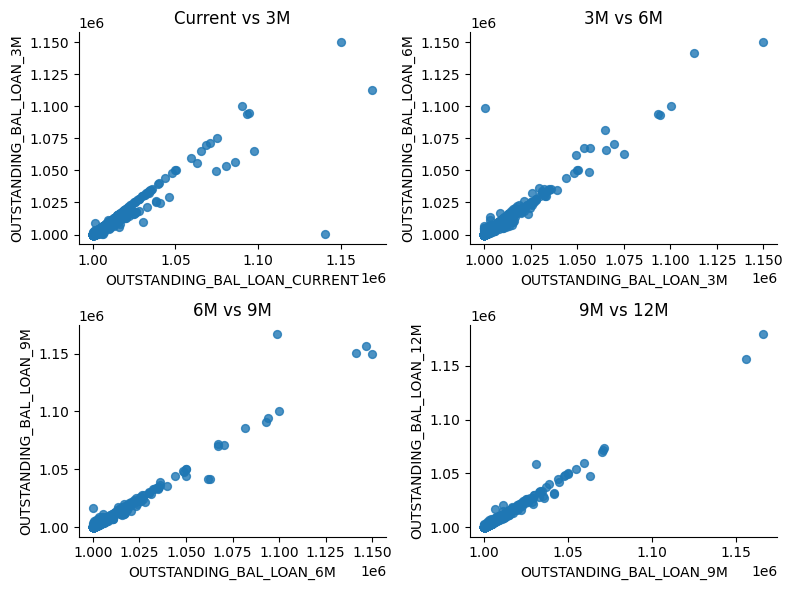

In [59]:
from matplotlib import pyplot as plt

# Tạo một figure với 4 subplots (2 hàng và 2 cột)
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Vẽ biểu đồ phân tán cho từng cặp dữ liệu
outstanding_loan_df.plot(kind='scatter', x='OUTSTANDING_BAL_LOAN_CURRENT', y='OUTSTANDING_BAL_LOAN_3M', s=32, alpha=.8, ax=axes[0, 0])
axes[0, 0].spines[['top', 'right']].set_visible(False)
axes[0, 0].set_title('Current vs 3M')

outstanding_loan_df.plot(kind='scatter', x='OUTSTANDING_BAL_LOAN_3M', y='OUTSTANDING_BAL_LOAN_6M', s=32, alpha=.8, ax=axes[0, 1])
axes[0, 1].spines[['top', 'right']].set_visible(False)
axes[0, 1].set_title('3M vs 6M')

outstanding_loan_df.plot(kind='scatter', x='OUTSTANDING_BAL_LOAN_6M', y='OUTSTANDING_BAL_LOAN_9M', s=32, alpha=.8, ax=axes[1, 0])
axes[1, 0].spines[['top', 'right']].set_visible(False)
axes[1, 0].set_title('6M vs 9M')

outstanding_loan_df.plot(kind='scatter', x='OUTSTANDING_BAL_LOAN_9M', y='OUTSTANDING_BAL_LOAN_12M', s=32, alpha=.8, ax=axes[1, 1])
axes[1, 1].spines[['top', 'right']].set_visible(False)
axes[1, 1].set_title('9M vs 12M')

# Thêm không gian giữa các subplots
plt.tight_layout()
plt.show()


In [60]:
df[['OUTSTANDING_BAL_LOAN_CURRENT','OUTSTANDING_BAL_LOAN_3M', 'OUTSTANDING_BAL_LOAN_6M', 'OUTSTANDING_BAL_LOAN_9M', 'OUTSTANDING_BAL_LOAN_12M']].head(20)

,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M
0,1000000.0,1000000.0,1000000.0,1000000.0,1000205.0
1,1000250.0,1000220.0,1000197.0,1000142.0,1000175.0
3,1000040.0,1000030.0,1000040.0,1000035.0,1000043.0
4,1000200.0,1000210.0,1000142.0,1000094.0,1000071.0
5,1000100.0,1000034.0,1000017.0,1000011.0,1000008.0
6,1001670.0,1001053.0,1001287.0,1001291.0,1001293.0
7,1000450.0,1000247.0,1000253.0,1000270.0,1000234.0
8,1000290.0,1000079.0,1000075.0,1000050.0,1000038.0
9,1000260.0,1000147.0,1000150.0,1000126.0,1000095.0
10,1000130.0,1000427.0,1000522.0,1000533.0,1000535.0


In [61]:
outstanding_cc_df = df[['OUTSTANDING_BAL_CC_3M','OUTSTANDING_BAL_CC_6M', 'OUTSTANDING_BAL_CC_9M', 'OUTSTANDING_BAL_CC_12M']]
imputer = KNNImputer(n_neighbors=10)
outstanding_cc_df = imputer.fit_transform(outstanding_cc_df)
outstanding_cc_df = pd.DataFrame(outstanding_cc_df, columns=['OUTSTANDING_BAL_CC_3M','OUTSTANDING_BAL_CC_6M', 'OUTSTANDING_BAL_CC_9M', 'OUTSTANDING_BAL_CC_12M'])
outstanding_cc_df = outstanding_cc_df.round(0)
df[['OUTSTANDING_BAL_CC_3M','OUTSTANDING_BAL_CC_6M', 'OUTSTANDING_BAL_CC_9M', 'OUTSTANDING_BAL_CC_12M']] = outstanding_cc_df.values
outstanding_cc_df.head(20)

,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M
0,1000000.0,1000000.0,1000000.0,1000000.0
1,1000213.0,1000155.0,1000107.0,1000080.0
2,1000110.0,1000080.0,1000060.0,1000046.0
3,1000133.0,1000088.0,1000070.0,1000052.0
4,1000003.0,1000005.0,1000003.0,1000002.0
5,1000380.0,1000565.0,1000548.0,1000568.0
6,999990.0,999990.0,999990.0,999990.0
7,1000017.0,1000015.0,1000010.0,1000008.0
8,1000023.0,1000015.0,1000010.0,1000008.0
9,1000240.0,1000120.0,1000080.0,1000060.0


In [62]:
df.loc[:,'OUTSTANDING_BAL_ALL_3M'] = df['OUTSTANDING_BAL_CC_3M'] + df['OUTSTANDING_BAL_LOAN_3M']
df.loc[:,'OUTSTANDING_BAL_ALL_6M'] = df['OUTSTANDING_BAL_CC_6M'] + df['OUTSTANDING_BAL_LOAN_6M']
df.loc[:,'OUTSTANDING_BAL_ALL_9M'] = df['OUTSTANDING_BAL_CC_9M'] + df['OUTSTANDING_BAL_LOAN_9M']
df.loc[:,'OUTSTANDING_BAL_ALL_12M'] = df['OUTSTANDING_BAL_CC_12M'] + df['OUTSTANDING_BAL_LOAN_12M']
df.loc[:,'OUTSTANDING_BAL_ALL_CURRENT'] = df['OUTSTANDING_BAL_CC_CURRENT'] + df['OUTSTANDING_BAL_LOAN_CURRENT']

In [63]:
df[['OUTSTANDING_BAL_LOAN_CURRENT','OUTSTANDING_BAL_LOAN_3M', 'OUTSTANDING_BAL_LOAN_6M', 'OUTSTANDING_BAL_LOAN_9M', 'OUTSTANDING_BAL_LOAN_12M','OUTSTANDING_BAL_CC_3M','OUTSTANDING_BAL_CC_6M', 'OUTSTANDING_BAL_CC_9M', 'OUTSTANDING_BAL_CC_12M' ,'OUTSTANDING_BAL_ALL_3M','OUTSTANDING_BAL_ALL_6M', 'OUTSTANDING_BAL_ALL_9M', 'OUTSTANDING_BAL_ALL_12M']].head(20)

,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M
0,1000000.0,1000000.0,1000000.0,1000000.0,1000205.0,1000000.0,1000000.0,1000000.0,1000000.0,2000000.0,2000000.0,2000000.0,2000205.0
1,1000250.0,1000220.0,1000197.0,1000142.0,1000175.0,1000213.0,1000155.0,1000107.0,1000080.0,2000433.0,2000352.0,2000249.0,2000255.0
3,1000040.0,1000030.0,1000040.0,1000035.0,1000043.0,1000110.0,1000080.0,1000060.0,1000046.0,2000140.0,2000120.0,2000095.0,2000089.0
4,1000200.0,1000210.0,1000142.0,1000094.0,1000071.0,1000133.0,1000088.0,1000070.0,1000052.0,2000343.0,2000230.0,2000164.0,2000123.0
5,1000100.0,1000034.0,1000017.0,1000011.0,1000008.0,1000003.0,1000005.0,1000003.0,1000002.0,2000037.0,2000022.0,2000014.0,2000010.0
6,1001670.0,1001053.0,1001287.0,1001291.0,1001293.0,1000380.0,1000565.0,1000548.0,1000568.0,2001433.0,2001852.0,2001839.0,2001861.0
7,1000450.0,1000247.0,1000253.0,1000270.0,1000234.0,999990.0,999990.0,999990.0,999990.0,2000237.0,2000243.0,2000260.0,2000224.0
8,1000290.0,1000079.0,1000075.0,1000050.0,1000038.0,1000017.0,1000015.0,1000010.0,1000008.0,2000096.0,2000090.0,2000060.0,2000046.0
9,1000260.0,1000147.0,1000150.0,1000126.0,1000095.0,1000023.0,1000015.0,1000010.0,1000008.0,2000170.0,2000165.0,2000136.0,2000103.0
10,1000130.0,1000427.0,1000522.0,1000533.0,1000535.0,1000240.0,1000120.0,1000080.0,1000060.0,2000667.0,2000642.0,2000613.0,2000595.0


**Solve Outstanding_BAL_LOAN_xM_yM**

In [64]:
df['OUTSTANDING_BAL_LOAN_3M_6M'] = df['OUTSTANDING_BAL_LOAN_3M'] - df['OUTSTANDING_BAL_LOAN_6M']
df['OUTSTANDING_BAL_LOAN_6M_9M'] = df['OUTSTANDING_BAL_LOAN_6M'] - df['OUTSTANDING_BAL_LOAN_9M']
df['OUTSTANDING_BAL_LOAN_9M_12M'] = df['OUTSTANDING_BAL_LOAN_9M'] - df['OUTSTANDING_BAL_LOAN_12M']
df['OUTSTANDING_BAL_LOAN_6M_12M'] = df['OUTSTANDING_BAL_LOAN_6M'] - df['OUTSTANDING_BAL_LOAN_12M']
df['OUTSTANDING_BAL_LOAN_3M_12M'] = df['OUTSTANDING_BAL_LOAN_3M'] - df['OUTSTANDING_BAL_LOAN_12M']

**Solve Outstanding_BAL_CC_xM_yM**

In [65]:
df['OUTSTANDING_BAL_CC_3M_6M'] = df['OUTSTANDING_BAL_CC_3M'] - df['OUTSTANDING_BAL_CC_6M']
df['OUTSTANDING_BAL_CC_6M_9M'] = df['OUTSTANDING_BAL_CC_6M'] - df['OUTSTANDING_BAL_CC_9M']
df['OUTSTANDING_BAL_CC_9M_12M'] = df['OUTSTANDING_BAL_CC_9M'] - df['OUTSTANDING_BAL_CC_12M']
df['OUTSTANDING_BAL_CC_6M_12M'] = df['OUTSTANDING_BAL_CC_6M'] - df['OUTSTANDING_BAL_CC_12M']
df['OUTSTANDING_BAL_CC_3M_12M'] = df['OUTSTANDING_BAL_CC_3M'] - df['OUTSTANDING_BAL_CC_12M']

**Solve Outstanding_BAL_ALL_xM_yM**

In [66]:
df['OUTSTANDING_BAL_ALL_3M_6M'] = df['OUTSTANDING_BAL_ALL_3M'] - df['OUTSTANDING_BAL_ALL_6M']
df['OUTSTANDING_BAL_ALL_6M_9M'] = df['OUTSTANDING_BAL_ALL_6M'] - df['OUTSTANDING_BAL_ALL_9M']
df['OUTSTANDING_BAL_ALL_9M_12M'] = df['OUTSTANDING_BAL_ALL_9M'] - df['OUTSTANDING_BAL_ALL_12M']
df['OUTSTANDING_BAL_ALL_6M_12M'] = df['OUTSTANDING_BAL_ALL_6M'] - df['OUTSTANDING_BAL_ALL_12M']
df['OUTSTANDING_BAL_ALL_3M_12M'] = df['OUTSTANDING_BAL_ALL_3M'] - df['OUTSTANDING_BAL_ALL_12M']
df[['OUTSTANDING_BAL_LOAN_3M_6M','OUTSTANDING_BAL_LOAN_6M_9M','OUTSTANDING_BAL_LOAN_9M_12M','OUTSTANDING_BAL_LOAN_6M_12M','OUTSTANDING_BAL_LOAN_3M_12M','OUTSTANDING_BAL_CC_3M_6M',
    'OUTSTANDING_BAL_CC_6M_9M','OUTSTANDING_BAL_CC_9M_12M','OUTSTANDING_BAL_CC_6M_12M','OUTSTANDING_BAL_CC_3M_12M','OUTSTANDING_BAL_ALL_3M_6M','OUTSTANDING_BAL_ALL_6M_9M','OUTSTANDING_BAL_ALL_9M_12M',
    'OUTSTANDING_BAL_ALL_6M_12M','OUTSTANDING_BAL_ALL_3M_12M']].head(20)

,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M
0,0.0,0.0,-205.0,-205.0,-205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-205.0,-205.0,-205.0
1,23.0,55.0,-33.0,22.0,45.0,58.0,48.0,27.0,75.0,133.0,81.0,103.0,-6.0,97.0,178.0
3,-10.0,5.0,-8.0,-3.0,-13.0,30.0,20.0,14.0,34.0,64.0,20.0,25.0,6.0,31.0,51.0
4,68.0,48.0,23.0,71.0,139.0,45.0,18.0,18.0,36.0,81.0,113.0,66.0,41.0,107.0,220.0
5,17.0,6.0,3.0,9.0,26.0,-2.0,2.0,1.0,3.0,1.0,15.0,8.0,4.0,12.0,27.0
6,-234.0,-4.0,-2.0,-6.0,-240.0,-185.0,17.0,-20.0,-3.0,-188.0,-419.0,13.0,-22.0,-9.0,-428.0
7,-6.0,-17.0,36.0,19.0,13.0,0.0,0.0,0.0,0.0,0.0,-6.0,-17.0,36.0,19.0,13.0
8,4.0,25.0,12.0,37.0,41.0,2.0,5.0,2.0,7.0,9.0,6.0,30.0,14.0,44.0,50.0
9,-3.0,24.0,31.0,55.0,52.0,8.0,5.0,2.0,7.0,15.0,5.0,29.0,33.0,62.0,67.0
10,-95.0,-11.0,-2.0,-13.0,-108.0,120.0,40.0,20.0,60.0,180.0,25.0,29.0,18.0,47.0,72.0


**Solve Increase Outstanding**

In [67]:
print(df[['INCREASING_BAL_3M_LOAN', 'INCREASING_BAL_3M_CC']].isna().sum())

INCREASING_BAL_3M_LOAN    1941
INCREASING_BAL_3M_CC      1940
dtype: int64


In [68]:
df.loc[:,'INCREASING_BAL_3M_ALL'] = df['INCREASING_BAL_3M_ALL']*2

df.loc[:,'INCREASING_BAL_3M_LOAN'] = df['INCREASING_BAL_3M_LOAN'].fillna(df['INCREASING_BAL_3M_ALL']-df['INCREASING_BAL_3M_CC'])
df.loc[:,'INCREASING_BAL_3M_CC'] = df['INCREASING_BAL_3M_CC'].fillna(df['INCREASING_BAL_3M_ALL']-df['INCREASING_BAL_3M_LOAN'])
df.loc[:,'INCREASING_BAL_3M_CC'] = df['INCREASING_BAL_3M_CC'].fillna(df['INCREASING_BAL_3M_CC'].mode()[0])
df.loc[:,'INCREASING_BAL_3M_LOAN'] = df['INCREASING_BAL_3M_LOAN'].fillna(df['INCREASING_BAL_3M_LOAN'].mode()[0])
df.loc[:,'INCREASING_BAL_3M_ALL'] = df['INCREASING_BAL_3M_ALL'].fillna(df['INCREASING_BAL_3M_LOAN'] + df['INCREASING_BAL_3M_CC'])
df[['INCREASING_BAL_3M_LOAN','INCREASING_BAL_3M_CC','INCREASING_BAL_3M_ALL']].isna().sum()

INCREASING_BAL_3M_LOAN    0
INCREASING_BAL_3M_CC      0
INCREASING_BAL_3M_ALL     0
dtype: int64

In [69]:
df.loc[:,'INCREASING_BAL_6M_ALL'] = df['INCREASING_BAL_6M_ALL']*2
df.loc[:,'INCREASING_BAL_6M_LOAN'] = df['INCREASING_BAL_6M_LOAN'].fillna(df['INCREASING_BAL_6M_ALL']-df['INCREASING_BAL_6M_CC'])
df.loc[:,'INCREASING_BAL_6M_CC'] = df['INCREASING_BAL_6M_CC'].fillna(df['INCREASING_BAL_6M_ALL']-df['INCREASING_BAL_6M_LOAN'])
df.loc[:,'INCREASING_BAL_6M_CC'] = df['INCREASING_BAL_6M_CC'].fillna(df['INCREASING_BAL_6M_CC'].mode()[0])
df.loc[:,'INCREASING_BAL_6M_LOAN'] = df['INCREASING_BAL_6M_LOAN'].fillna(df['INCREASING_BAL_6M_LOAN'].mode()[0])
df.loc[:,'INCREASING_BAL_6M_ALL'] = df['INCREASING_BAL_6M_ALL'].fillna(df['INCREASING_BAL_6M_LOAN'] + df['INCREASING_BAL_6M_CC'])
df[['INCREASING_BAL_6M_LOAN','INCREASING_BAL_6M_CC','INCREASING_BAL_6M_ALL']].isna().sum()

INCREASING_BAL_6M_LOAN    0
INCREASING_BAL_6M_CC      0
INCREASING_BAL_6M_ALL     0
dtype: int64

In [70]:
CC_Month_Since_df = pd.DataFrame()
CC_Month_Since_df = df[['CREDIT_CARD_MONTH_SINCE_10DPD','CREDIT_CARD_MONTH_SINCE_30DPD', 'CREDIT_CARD_MONTH_SINCE_60DPD', 'CREDIT_CARD_MONTH_SINCE_90DPD']]

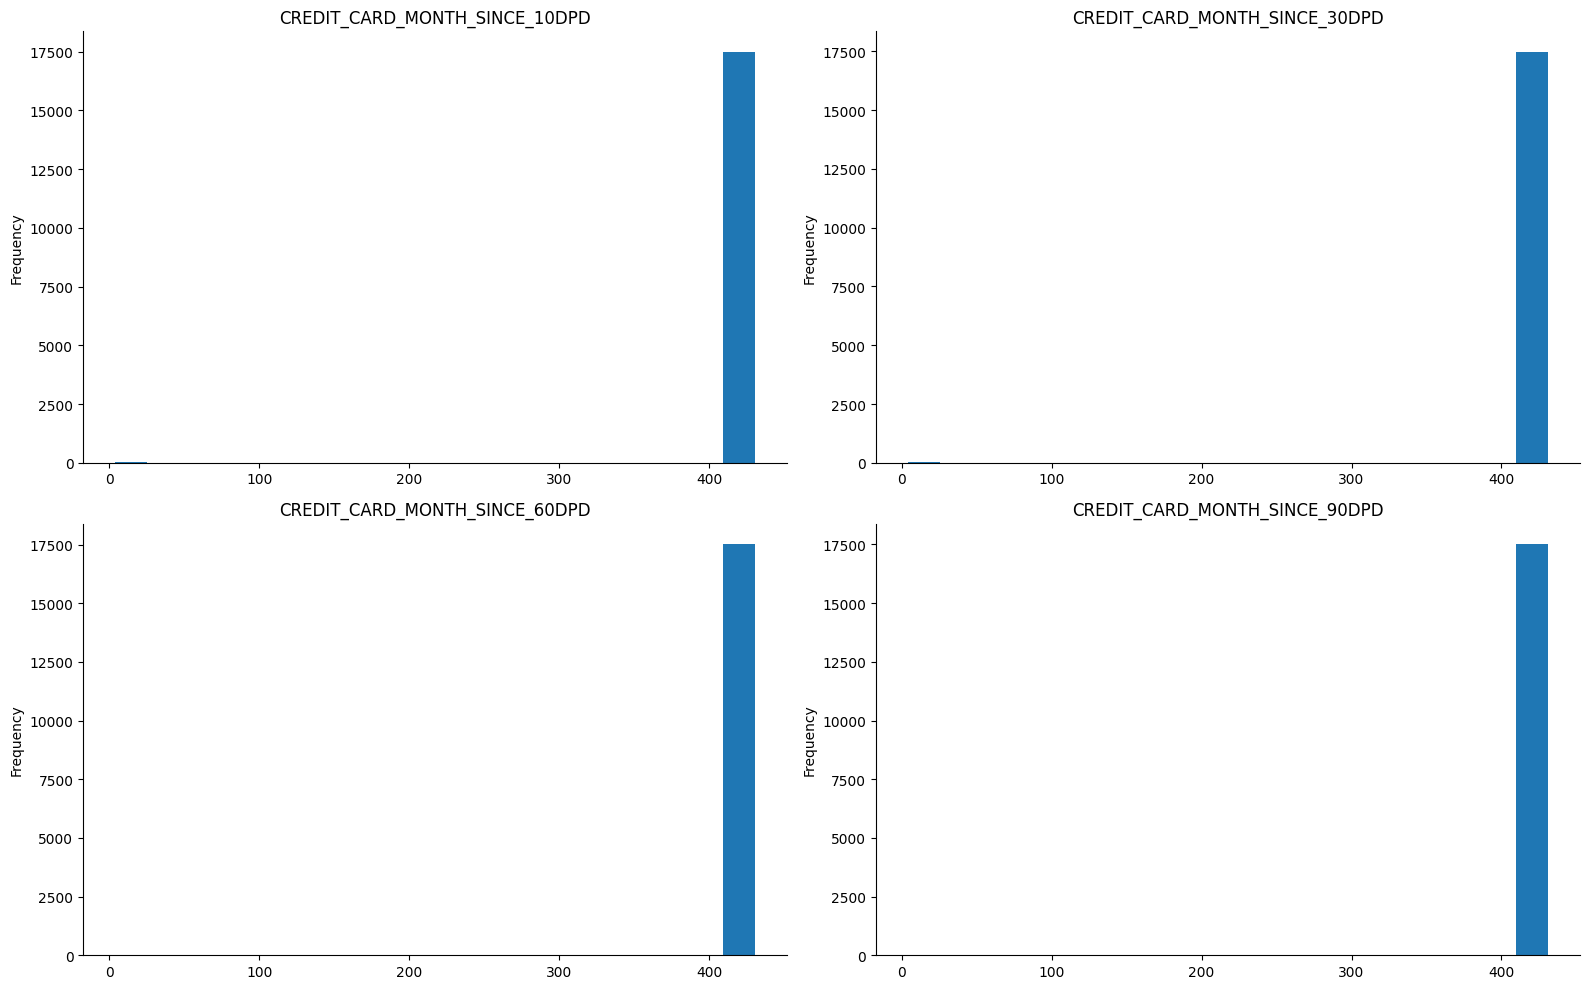

In [71]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

CC_Month_Since_df['CREDIT_CARD_MONTH_SINCE_10DPD'].plot(kind='hist', bins=20, ax=axs[0, 0], title='CREDIT_CARD_MONTH_SINCE_10DPD')
axs[0, 0].spines[['top', 'right']].set_visible(False)

CC_Month_Since_df['CREDIT_CARD_MONTH_SINCE_30DPD'].plot(kind='hist', bins=20, ax=axs[0, 1], title='CREDIT_CARD_MONTH_SINCE_30DPD')
axs[0, 1].spines[['top', 'right']].set_visible(False)

CC_Month_Since_df['CREDIT_CARD_MONTH_SINCE_60DPD'].plot(kind='hist', bins=20, ax=axs[1, 0], title='CREDIT_CARD_MONTH_SINCE_60DPD')
axs[1, 0].spines[['top', 'right']].set_visible(False)

CC_Month_Since_df['CREDIT_CARD_MONTH_SINCE_90DPD'].plot(kind='hist', bins=20, ax=axs[1, 1], title='CREDIT_CARD_MONTH_SINCE_90DPD')
axs[1, 1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


In [72]:
df['CREDIT_CARD_MONTH_SINCE_10DPD'] = df['CREDIT_CARD_MONTH_SINCE_10DPD'].fillna(df['CREDIT_CARD_MONTH_SINCE_10DPD'].mean())
df['CREDIT_CARD_MONTH_SINCE_30DPD'] = df['CREDIT_CARD_MONTH_SINCE_30DPD'].fillna(df['CREDIT_CARD_MONTH_SINCE_30DPD'].mean())
df['CREDIT_CARD_MONTH_SINCE_60DPD'] = df['CREDIT_CARD_MONTH_SINCE_60DPD'].fillna(df['CREDIT_CARD_MONTH_SINCE_60DPD'].mean())
df['CREDIT_CARD_MONTH_SINCE_90DPD'] = df['CREDIT_CARD_MONTH_SINCE_90DPD'].fillna(df['CREDIT_CARD_MONTH_SINCE_90DPD'].mean())

df['CREDIT_CARD_MONTH_SINCE_10DPD'] = df['CREDIT_CARD_MONTH_SINCE_10DPD'].round(0)
df['CREDIT_CARD_MONTH_SINCE_30DPD'] = df['CREDIT_CARD_MONTH_SINCE_30DPD'].round(0)
df['CREDIT_CARD_MONTH_SINCE_60DPD'] = df['CREDIT_CARD_MONTH_SINCE_60DPD'].round(0)
df['CREDIT_CARD_MONTH_SINCE_90DPD'] = df['CREDIT_CARD_MONTH_SINCE_90DPD'].round(0)

df[['CREDIT_CARD_MONTH_SINCE_10DPD','CREDIT_CARD_MONTH_SINCE_30DPD','CREDIT_CARD_MONTH_SINCE_60DPD','CREDIT_CARD_MONTH_SINCE_90DPD']].head(20)


,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD
0,431.0,431.0,431.0,431.0
1,431.0,431.0,431.0,431.0
3,430.0,431.0,431.0,431.0
4,431.0,431.0,431.0,431.0
5,431.0,431.0,431.0,431.0
6,431.0,431.0,431.0,431.0
7,431.0,431.0,431.0,431.0
8,431.0,431.0,431.0,431.0
9,431.0,431.0,431.0,431.0
10,431.0,431.0,431.0,431.0


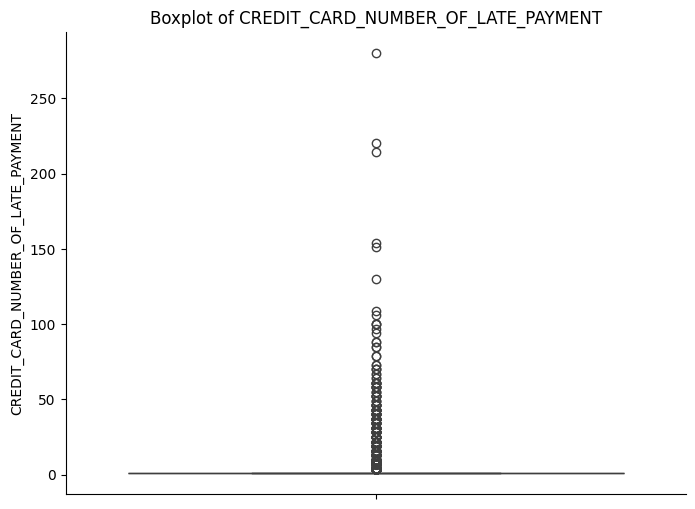

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'])
plt.title('Boxplot of CREDIT_CARD_NUMBER_OF_LATE_PAYMENT')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


In [74]:
df['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'] = df['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'].fillna(0)
df['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'].isna().sum()

0

In [75]:
from sklearn.ensemble import IsolationForest

# Khởi tạo mô hình Isolation Forest
iso_forest = IsolationForest(contamination=0.01)  # Đặt tỷ lệ ngoại lai mong muốn (1%)

# Fit và dự đoán các điểm ngoại lai
outliers = iso_forest.fit_predict(df[['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT']])

# Lọc dữ liệu gốc df để giữ lại các điểm không phải là ngoại lai (dự đoán là 1)
df = df[outliers == 1]

# Loại bỏ các hàng có giá trị NA trong cột 'CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'
df.dropna(subset=['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'], inplace=True)

# Kiểm tra lại sau khi loại bỏ NA
print("Số lượng NA sau khi xóa:", df['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'].isna().sum())


Số lượng NA sau khi xóa: 0


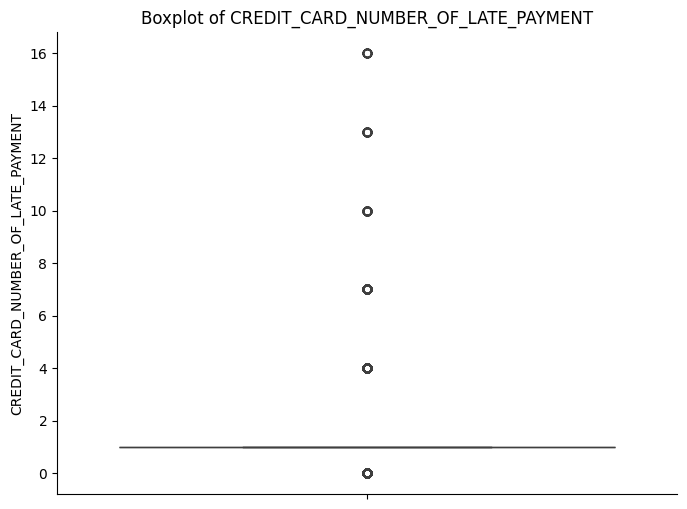

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'])
plt.title('Boxplot of CREDIT_CARD_NUMBER_OF_LATE_PAYMENT')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


Fill BANK 3M

In [77]:
df['difference'] = df['ENQUIRIES_FROM_BANK_3M'] - (df['ENQUIRIES_FROM_BANK_FOR_LOAN_3M'] + df['ENQUIRIES_FROM_BANK_FOR_CC_3M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15632
NaN     3651
Name: count, dtype: int64


In [78]:
df = df.loc[~df['difference'].isin([3, 8, 13])]
df.loc[:, 'ENQUIRIES_FROM_BANK_3M'] = df['ENQUIRIES_FROM_BANK_3M'] + 2

df.loc[:, 'ENQUIRIES_FROM_BANK_3M'] = df['ENQUIRIES_FROM_BANK_3M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_LOAN_3M'] + df['ENQUIRIES_FROM_BANK_FOR_CC_3M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_3M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_3M'].fillna(
    df['ENQUIRIES_FROM_BANK_3M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_3M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_3M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_3M'].fillna(
    df['ENQUIRIES_FROM_BANK_3M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_3M']
)

Fill NonBank 3M

In [79]:
df.loc[:,'difference'] = df['ENQUIRIES_FROM_NON_BANK_3M'] - (df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_3M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15582
NaN     3640
Name: count, dtype: int64


In [80]:
df = df.loc[~df['difference'].isin([3, 8,])]

df['ENQUIRIES_FROM_NON_BANK_3M'] = df['ENQUIRIES_FROM_NON_BANK_3M'] + 2
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_3M'] = df['ENQUIRIES_FROM_NON_BANK_3M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_3M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_3M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_3M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_3M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_3M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_3M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M']
)

**Fill Loan 3M**

In [81]:
df['difference'] = df['ENQUIRIES_FOR_LOAN_3M'] - (df['ENQUIRIES_FROM_BANK_FOR_LOAN_3M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15574
NaN     3639
Name: count, dtype: int64


In [82]:
df = df[~df['difference'].isin([-7])]
df['ENQUIRIES_FOR_LOAN_3M'] = df['ENQUIRIES_FOR_LOAN_3M'] + 2

df.loc[:, 'ENQUIRIES_FOR_LOAN_3M'] = df['ENQUIRIES_FOR_LOAN_3M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_LOAN_3M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M']
)

df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_3M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_3M'].fillna(
    df['ENQUIRIES_FOR_LOAN_3M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M'].fillna(
    df['ENQUIRIES_FOR_LOAN_3M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_3M']
)

Fill CC 3M

In [83]:
df['difference'] = df['ENQUIRIES_FOR_CC_3M'] - (df['ENQUIRIES_FROM_BANK_FOR_CC_3M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_3M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15566
NaN     3638
Name: count, dtype: int64


In [84]:
df = df.loc[~df['difference'].isin([-7, -12, -22])]

df.loc[:, 'ENQUIRIES_FOR_CC_3M'] = df['ENQUIRIES_FOR_CC_3M'] + 2

df.loc[:, 'ENQUIRIES_FOR_CC_3M'] = df['ENQUIRIES_FOR_CC_3M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_CC_3M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_3M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_3M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_3M'].fillna(
    df['ENQUIRIES_FOR_CC_3M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_3M']
)
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_3M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_3M'].fillna(
    df['ENQUIRIES_FOR_CC_3M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_3M']
)

Fill Enquiries 3M

In [85]:
df['difference'] = df['ENQUIRIES_3M'] - (df['ENQUIRIES_FROM_BANK_3M'] + df['ENQUIRIES_FROM_NON_BANK_3M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15558
NaN     3637
Name: count, dtype: int64


In [86]:
df = df.loc[~df['difference'].isin([-1])]
df.loc[:, 'ENQUIRIES_3M'] = df['ENQUIRIES_3M'] + 6
df.loc[:, 'ENQUIRIES_3M'] = df['ENQUIRIES_3M'].fillna(
    df['ENQUIRIES_FROM_BANK_3M'] + df['ENQUIRIES_FROM_NON_BANK_3M']
)
df.loc[:, 'ENQUIRIES_3M'] = df['ENQUIRIES_3M'].fillna(
    df['ENQUIRIES_FOR_LOAN_3M'] + df['ENQUIRIES_FOR_CC_3M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_3M'] = df['ENQUIRIES_FROM_BANK_3M'].fillna(
    df['ENQUIRIES_3M'] - df['ENQUIRIES_FROM_NON_BANK_3M']
)
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_3M'] = df['ENQUIRIES_FROM_NON_BANK_3M'].fillna(
    df['ENQUIRIES_3M'] - df['ENQUIRIES_FROM_BANK_3M']
)
df.loc[:, 'ENQUIRIES_FOR_LOAN_3M'] = df['ENQUIRIES_FOR_LOAN_3M'].fillna(
    df['ENQUIRIES_3M'] - df['ENQUIRIES_FOR_CC_3M']
)
df.loc[:, 'ENQUIRIES_FOR_CC_3M'] = df['ENQUIRIES_FOR_CC_3M'].fillna(
    df['ENQUIRIES_3M'] - df['ENQUIRIES_FOR_LOAN_3M']
)


Fill ngược trở lại để fill vào những trường NULL còn lại

In [87]:
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_3M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_3M'].fillna(
    df['ENQUIRIES_FOR_LOAN_3M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M'].fillna(
    df['ENQUIRIES_FOR_LOAN_3M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_3M']
)

df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_3M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_3M'].fillna(
    df['ENQUIRIES_FOR_CC_3M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_3M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_3M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_3M'].fillna(
    df['ENQUIRIES_FOR_CC_3M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_3M']
)


In [88]:
df[['ENQUIRIES_3M','ENQUIRIES_FROM_BANK_3M','ENQUIRIES_FROM_NON_BANK_3M','ENQUIRIES_FOR_LOAN_3M','ENQUIRIES_FOR_CC_3M','ENQUIRIES_FROM_BANK_FOR_LOAN_3M','ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M','ENQUIRIES_FROM_BANK_FOR_CC_3M','ENQUIRIES_FROM_NON_BANK_FOR_CC_3M']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19190 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ENQUIRIES_3M                         19183 non-null  float64
 1   ENQUIRIES_FROM_BANK_3M               19179 non-null  float64
 2   ENQUIRIES_FROM_NON_BANK_3M           19180 non-null  float64
 3   ENQUIRIES_FOR_LOAN_3M                19182 non-null  float64
 4   ENQUIRIES_FOR_CC_3M                  19183 non-null  float64
 5   ENQUIRIES_FROM_BANK_FOR_LOAN_3M      19176 non-null  float64
 6   ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M  19176 non-null  float64
 7   ENQUIRIES_FROM_BANK_FOR_CC_3M        19181 non-null  float64
 8   ENQUIRIES_FROM_NON_BANK_FOR_CC_3M    19178 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [89]:
new_df = df[['ENQUIRIES_3M','ENQUIRIES_FROM_BANK_3M','ENQUIRIES_FROM_NON_BANK_3M','ENQUIRIES_FOR_LOAN_3M','ENQUIRIES_FOR_CC_3M','ENQUIRIES_FROM_BANK_FOR_LOAN_3M','ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M','ENQUIRIES_FROM_BANK_FOR_CC_3M','ENQUIRIES_FROM_NON_BANK_FOR_CC_3M']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,ENQUIRIES_3M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M
620,NaN,4.0,NaN,9.0,NaN,2.0,7.0,2.0,NaN
760,13.0,4.0,9.0,9.0,4.0,NaN,NaN,2.0,2.0
1132,NaN,NaN,14.0,NaN,4.0,NaN,12.0,2.0,2.0
1779,33.0,NaN,NaN,24.0,9.0,NaN,NaN,7.0,2.0
2154,18.0,NaN,NaN,14.0,4.0,NaN,NaN,2.0,2.0
2222,18.0,4.0,14.0,14.0,4.0,2.0,12.0,NaN,NaN
2710,13.0,4.0,9.0,NaN,NaN,2.0,NaN,2.0,NaN
3307,18.0,4.0,14.0,NaN,NaN,2.0,NaN,2.0,NaN
3332,NaN,4.0,NaN,NaN,4.0,2.0,NaN,2.0,2.0
5037,NaN,4.0,NaN,9.0,NaN,2.0,7.0,2.0,NaN


Fill Bank 6M

In [90]:
df['difference'] = df['ENQUIRIES_FROM_BANK_6M'] - (df['ENQUIRIES_FROM_BANK_FOR_LOAN_6M'] + df['ENQUIRIES_FROM_BANK_FOR_CC_6M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15553
NaN     3637
Name: count, dtype: int64


In [91]:
df = df.loc[~df['difference'].isin([3, 8, 18])]
df.loc[:, 'ENQUIRIES_FROM_BANK_6M'] = df['ENQUIRIES_FROM_BANK_6M'] + 2

df.loc[:, 'ENQUIRIES_FROM_BANK_6M'] = df['ENQUIRIES_FROM_BANK_6M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_LOAN_6M'] + df['ENQUIRIES_FROM_BANK_FOR_CC_6M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_6M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_6M'].fillna(
    df['ENQUIRIES_FROM_BANK_6M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_6M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_6M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_6M'].fillna(
    df['ENQUIRIES_FROM_BANK_6M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_6M']
)

Fill NonBank 6M

In [92]:
df.loc[:,'difference'] = df['ENQUIRIES_FROM_NON_BANK_6M'] - (df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_6M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15505
NaN     3621
Name: count, dtype: int64


In [93]:
df = df.loc[~df['difference'].isin([6])]

df['ENQUIRIES_FROM_NON_BANK_6M'] = df['ENQUIRIES_FROM_NON_BANK_6M'] + 2
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_6M'] = df['ENQUIRIES_FROM_NON_BANK_6M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_6M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_6M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_6M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_6M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_6M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_6M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M']
)

Fill Loan 6M

In [94]:
df['difference'] = df['ENQUIRIES_FOR_LOAN_6M'] - (df['ENQUIRIES_FROM_BANK_FOR_LOAN_6M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15505
NaN     3621
Name: count, dtype: int64


In [95]:
df = df[~df['difference'].isin([-7,-12])]
df['ENQUIRIES_FOR_LOAN_6M'] = df['ENQUIRIES_FOR_LOAN_6M'] + 2

df.loc[:, 'ENQUIRIES_FOR_LOAN_6M'] = df['ENQUIRIES_FOR_LOAN_6M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_LOAN_6M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M']
)

df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_6M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_6M'].fillna(
    df['ENQUIRIES_FOR_LOAN_6M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M'].fillna(
    df['ENQUIRIES_FOR_LOAN_6M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_6M']
)

Fill CC 6M

In [96]:
df['difference'] = df['ENQUIRIES_FOR_CC_6M'] - (df['ENQUIRIES_FROM_BANK_FOR_CC_6M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_6M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15500
NaN     3619
Name: count, dtype: int64


In [97]:
df = df.loc[~df['difference'].isin([-7])]

df.loc[:, 'ENQUIRIES_FOR_CC_6M'] = df['ENQUIRIES_FOR_CC_6M'] + 2

df.loc[:, 'ENQUIRIES_FOR_CC_6M'] = df['ENQUIRIES_FOR_CC_6M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_CC_6M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_6M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_6M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_6M'].fillna(
    df['ENQUIRIES_FOR_CC_6M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_6M']
)
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_6M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_6M'].fillna(
    df['ENQUIRIES_FOR_CC_6M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_6M']
)

Fill Enquiries 6M

In [98]:
df['difference'] = df['ENQUIRIES_6M'] - (df['ENQUIRIES_FROM_BANK_6M'] + df['ENQUIRIES_FROM_NON_BANK_6M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15496
NaN     3618
Name: count, dtype: int64


In [99]:
df = df.loc[~df['difference'].isin([-1,4])]
df.loc[:, 'ENQUIRIES_6M'] = df['ENQUIRIES_6M'] + 6
df.loc[:, 'ENQUIRIES_6M'] = df['ENQUIRIES_6M'].fillna(
    df['ENQUIRIES_FROM_BANK_6M'] + df['ENQUIRIES_FROM_NON_BANK_6M']
)
df.loc[:, 'ENQUIRIES_6M'] = df['ENQUIRIES_6M'].fillna(
    df['ENQUIRIES_FOR_LOAN_6M'] + df['ENQUIRIES_FOR_CC_6M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_6M'] = df['ENQUIRIES_FROM_BANK_6M'].fillna(
    df['ENQUIRIES_6M'] - df['ENQUIRIES_FROM_NON_BANK_6M']
)
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_6M'] = df['ENQUIRIES_FROM_NON_BANK_6M'].fillna(
    df['ENQUIRIES_6M'] - df['ENQUIRIES_FROM_BANK_6M']
)
df.loc[:, 'ENQUIRIES_FOR_LOAN_6M'] = df['ENQUIRIES_FOR_LOAN_6M'].fillna(
    df['ENQUIRIES_6M'] - df['ENQUIRIES_FOR_CC_6M']
)
df.loc[:, 'ENQUIRIES_FOR_CC_6M'] = df['ENQUIRIES_FOR_CC_6M'].fillna(
    df['ENQUIRIES_6M'] - df['ENQUIRIES_FOR_LOAN_6M']
)


Fill Ngược trở lại

In [100]:
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_6M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_6M'].fillna(
    df['ENQUIRIES_FOR_LOAN_6M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M'].fillna(
    df['ENQUIRIES_FOR_LOAN_6M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_6M']
)

df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_6M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_6M'].fillna(
    df['ENQUIRIES_FOR_CC_6M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_6M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_6M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_6M'].fillna(
    df['ENQUIRIES_FOR_CC_6M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_6M']
)

In [101]:
new_df = df[['ENQUIRIES_6M','ENQUIRIES_FROM_BANK_6M','ENQUIRIES_FROM_NON_BANK_6M','ENQUIRIES_FOR_LOAN_6M','ENQUIRIES_FOR_CC_6M','ENQUIRIES_FROM_BANK_FOR_LOAN_6M','ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M','ENQUIRIES_FROM_BANK_FOR_CC_6M','ENQUIRIES_FROM_NON_BANK_FOR_CC_6M']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,ENQUIRIES_6M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M
1293,NaN,NaN,9.0,NaN,4.0,NaN,7.0,2.0,2.0
2233,13.0,4.0,9.0,9.0,4.0,2.0,7.0,NaN,NaN
2269,18.0,4.0,14.0,NaN,NaN,2.0,NaN,2.0,NaN
2603,13.0,NaN,NaN,9.0,4.0,2.0,7.0,2.0,2.0
3341,13.0,NaN,NaN,9.0,4.0,NaN,NaN,2.0,2.0
5834,18.0,4.0,14.0,14.0,4.0,NaN,NaN,NaN,NaN
5993,NaN,NaN,9.0,NaN,4.0,NaN,7.0,2.0,2.0
6387,18.0,NaN,NaN,14.0,4.0,NaN,NaN,2.0,2.0
6602,NaN,4.0,NaN,9.0,NaN,2.0,7.0,2.0,NaN
7140,13.0,4.0,9.0,NaN,NaN,2.0,NaN,2.0,NaN


Fill Bank 9M

In [102]:
df['difference'] = df['ENQUIRIES_FROM_BANK_9M'] - (df['ENQUIRIES_FROM_BANK_FOR_LOAN_9M'] + df['ENQUIRIES_FROM_BANK_FOR_CC_9M'])
unique_differences = df['difference'].unique()
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15494
NaN     3618
Name: count, dtype: int64


In [103]:
df = df.loc[~df['difference'].isin([3, 8, 18,13,23])]
df.loc[:, 'ENQUIRIES_FROM_BANK_9M'] = df['ENQUIRIES_FROM_BANK_9M'] + 2

df.loc[:, 'ENQUIRIES_FROM_BANK_9M'] = df['ENQUIRIES_FROM_BANK_9M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_LOAN_9M'] + df['ENQUIRIES_FROM_BANK_FOR_CC_9M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_9M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_9M'].fillna(
    df['ENQUIRIES_FROM_BANK_9M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_9M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_9M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_9M'].fillna(
    df['ENQUIRIES_FROM_BANK_9M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_9M']
)

Fill NON BANK 9M

In [104]:
df.loc[:,'difference'] = df['ENQUIRIES_FROM_NON_BANK_9M'] - (df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_9M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15434
NaN     3603
Name: count, dtype: int64


In [105]:
df = df.loc[~df['difference'].isin([3])]

df['ENQUIRIES_FROM_NON_BANK_9M'] = df['ENQUIRIES_FROM_NON_BANK_9M'] + 2
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_9M'] = df['ENQUIRIES_FROM_NON_BANK_9M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_9M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_9M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_9M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_9M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_9M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_9M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M']
)

Fill Loan 9M

In [106]:
df['difference'] = df['ENQUIRIES_FOR_LOAN_9M'] - (df['ENQUIRIES_FROM_BANK_FOR_LOAN_9M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15419
NaN     3601
Name: count, dtype: int64


In [107]:
df = df[~df['difference'].isin([-7,-12,-17])]
df['ENQUIRIES_FOR_LOAN_9M'] = df['ENQUIRIES_FOR_LOAN_9M'] + 2

df.loc[:, 'ENQUIRIES_FOR_LOAN_9M'] = df['ENQUIRIES_FOR_LOAN_9M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_LOAN_9M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M']
)

df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_9M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_9M'].fillna(
    df['ENQUIRIES_FOR_LOAN_9M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M'].fillna(
    df['ENQUIRIES_FOR_LOAN_9M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_9M']
)

Fill CC 9M

In [108]:
df['difference'] = df['ENQUIRIES_FOR_CC_9M'] - (df['ENQUIRIES_FROM_BANK_FOR_CC_9M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_9M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15413
NaN     3598
Name: count, dtype: int64


In [109]:
df = df.loc[~df['difference'].isin([-7,-12])]

df.loc[:, 'ENQUIRIES_FOR_CC_9M'] = df['ENQUIRIES_FOR_CC_9M'] + 2

df.loc[:, 'ENQUIRIES_FOR_CC_9M'] = df['ENQUIRIES_FOR_CC_9M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_CC_9M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_9M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_9M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_9M'].fillna(
    df['ENQUIRIES_FOR_CC_9M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_9M']
)
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_9M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_9M'].fillna(
    df['ENQUIRIES_FOR_CC_9M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_9M']
)

Fill Enquiries 9M

In [110]:
df['difference'] = df['ENQUIRIES_9M'] - (df['ENQUIRIES_FROM_BANK_9M'] + df['ENQUIRIES_FROM_NON_BANK_9M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15408
NaN     3596
Name: count, dtype: int64


In [111]:
df = df.loc[~df['difference'].isin([-1,4])]
df.loc[:, 'ENQUIRIES_9M'] = df['ENQUIRIES_9M'] + 6
df.loc[:, 'ENQUIRIES_9M'] = df['ENQUIRIES_9M'].fillna(
    df['ENQUIRIES_FROM_BANK_9M'] + df['ENQUIRIES_FROM_NON_BANK_9M']
)
df.loc[:, 'ENQUIRIES_9M'] = df['ENQUIRIES_9M'].fillna(
    df['ENQUIRIES_FOR_LOAN_9M'] + df['ENQUIRIES_FOR_CC_9M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_9M'] = df['ENQUIRIES_FROM_BANK_9M'].fillna(
    df['ENQUIRIES_9M'] - df['ENQUIRIES_FROM_NON_BANK_9M']
)
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_9M'] = df['ENQUIRIES_FROM_NON_BANK_9M'].fillna(
    df['ENQUIRIES_9M'] - df['ENQUIRIES_FROM_BANK_9M']
)
df.loc[:, 'ENQUIRIES_FOR_LOAN_9M'] = df['ENQUIRIES_FOR_LOAN_9M'].fillna(
    df['ENQUIRIES_9M'] - df['ENQUIRIES_FOR_CC_9M']
)
df.loc[:, 'ENQUIRIES_FOR_CC_9M'] = df['ENQUIRIES_FOR_CC_9M'].fillna(
    df['ENQUIRIES_9M'] - df['ENQUIRIES_FOR_LOAN_9M']
)

Fill ngược trở lại để fill giá trị còn NULL

In [112]:
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_9M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_9M'].fillna(
    df['ENQUIRIES_FOR_LOAN_9M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M'].fillna(
    df['ENQUIRIES_FOR_LOAN_9M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_9M']
)

df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_9M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_9M'].fillna(
    df['ENQUIRIES_FOR_CC_9M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_9M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_9M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_9M'].fillna(
    df['ENQUIRIES_FOR_CC_9M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_9M']
)

In [113]:
new_df = df[['ENQUIRIES_9M','ENQUIRIES_FROM_BANK_9M','ENQUIRIES_FROM_NON_BANK_9M','ENQUIRIES_FOR_LOAN_9M','ENQUIRIES_FOR_CC_9M','ENQUIRIES_FROM_BANK_FOR_LOAN_9M','ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M','ENQUIRIES_FROM_BANK_FOR_CC_9M','ENQUIRIES_FROM_NON_BANK_FOR_CC_9M']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,ENQUIRIES_9M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M
85,18.0,4.0,14.0,14.0,4.0,2.0,12.0,NaN,NaN
999,NaN,NaN,14.0,14.0,NaN,2.0,12.0,NaN,2.0
6219,28.0,14.0,14.0,NaN,NaN,7.0,NaN,7.0,NaN
6478,NaN,49.0,NaN,34.0,NaN,27.0,7.0,22.0,NaN
8420,NaN,4.0,NaN,NaN,4.0,2.0,NaN,2.0,2.0
9121,13.0,NaN,NaN,9.0,4.0,2.0,7.0,NaN,NaN
9506,48.0,19.0,29.0,NaN,NaN,12.0,NaN,7.0,NaN
9931,NaN,NaN,19.0,19.0,NaN,2.0,17.0,NaN,2.0
12492,13.0,4.0,9.0,NaN,NaN,NaN,7.0,NaN,2.0
12781,NaN,4.0,NaN,14.0,NaN,2.0,12.0,2.0,NaN


Fill Bank 12M

In [114]:
df['difference'] = df['ENQUIRIES_FROM_BANK_12M'] - (df['ENQUIRIES_FROM_BANK_FOR_LOAN_12M'] + df['ENQUIRIES_FROM_BANK_FOR_CC_12M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15401
NaN     3594
Name: count, dtype: int64


In [115]:
df = df.loc[~df['difference'].isin([3, 8])]
df.loc[:, 'ENQUIRIES_FROM_BANK_12M'] = df['ENQUIRIES_FROM_BANK_12M'] + 2

df.loc[:, 'ENQUIRIES_FROM_BANK_12M'] = df['ENQUIRIES_FROM_BANK_12M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_LOAN_12M'] + df['ENQUIRIES_FROM_BANK_FOR_CC_12M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_12M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_12M'].fillna(
    df['ENQUIRIES_FROM_BANK_12M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_12M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_12M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_12M'].fillna(
    df['ENQUIRIES_FROM_BANK_12M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_12M']
)

Fill Non Bank 12M

In [116]:
df.loc[:,'difference'] = df['ENQUIRIES_FROM_NON_BANK_12M'] - (df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_12M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15361
NaN     3588
Name: count, dtype: int64


In [117]:
df = df.loc[~df['difference'].isin([3])]

df['ENQUIRIES_FROM_NON_BANK_12M'] = df['ENQUIRIES_FROM_NON_BANK_12M'] + 2
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_12M'] = df['ENQUIRIES_FROM_NON_BANK_12M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_12M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_12M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_12M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_12M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_12M'].fillna(
    df['ENQUIRIES_FROM_NON_BANK_12M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M']
)

Fill Loan 12M

In [118]:
df['difference'] = df['ENQUIRIES_FOR_LOAN_12M'] - (df['ENQUIRIES_FROM_BANK_FOR_LOAN_12M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15355
NaN     3588
Name: count, dtype: int64


In [119]:
df = df[~df['difference'].isin([-7])]
df['ENQUIRIES_FOR_LOAN_12M'] = df['ENQUIRIES_FOR_LOAN_12M'] + 2

df.loc[:, 'ENQUIRIES_FOR_LOAN_12M'] = df['ENQUIRIES_FOR_LOAN_12M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_LOAN_12M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M']
)

df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_12M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_12M'].fillna(
    df['ENQUIRIES_FOR_LOAN_12M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M'].fillna(
    df['ENQUIRIES_FOR_LOAN_12M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_12M']
)

Fill CC 12M

In [120]:
df['difference'] = df['ENQUIRIES_FOR_CC_12M'] - (df['ENQUIRIES_FROM_BANK_FOR_CC_12M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_12M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15352
NaN     3586
Name: count, dtype: int64


In [121]:
df = df.loc[~df['difference'].isin([-7])]

df.loc[:, 'ENQUIRIES_FOR_CC_12M'] = df['ENQUIRIES_FOR_CC_12M'] + 2

df.loc[:, 'ENQUIRIES_FOR_CC_12M'] = df['ENQUIRIES_FOR_CC_12M'].fillna(
    df['ENQUIRIES_FROM_BANK_FOR_CC_12M'] + df['ENQUIRIES_FROM_NON_BANK_FOR_CC_12M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_12M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_12M'].fillna(
    df['ENQUIRIES_FOR_CC_12M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_12M']
)
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_12M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_12M'].fillna(
    df['ENQUIRIES_FOR_CC_12M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_12M']
)

Fill Enquiries 12M

In [122]:
df['difference'] = df['ENQUIRIES_12M'] - (df['ENQUIRIES_FROM_BANK_12M'] + df['ENQUIRIES_FROM_NON_BANK_12M'])
unique_differences = df['Difference'].unique()
print("Số lượng các giá trị khác biệt duy nhất:", len(pd.Series(unique_differences)))
difference_counts = df['Difference'].value_counts(dropna=False)
print(difference_counts)

Số lượng các giá trị khác biệt duy nhất: 2
Difference
0.0    15350
NaN     3586
Name: count, dtype: int64


In [123]:
df = df.loc[~df['difference'].isin([-1])]
df.loc[:, 'ENQUIRIES_12M'] = df['ENQUIRIES_12M'] + 6
df.loc[:, 'ENQUIRIES_12M'] = df['ENQUIRIES_12M'].fillna(
    df['ENQUIRIES_FROM_BANK_12M'] + df['ENQUIRIES_FROM_NON_BANK_12M']
)
df.loc[:, 'ENQUIRIES_12M'] = df['ENQUIRIES_12M'].fillna(
    df['ENQUIRIES_FOR_LOAN_12M'] + df['ENQUIRIES_FOR_CC_12M']
)
df.loc[:, 'ENQUIRIES_FROM_BANK_12M'] = df['ENQUIRIES_FROM_BANK_12M'].fillna(
    df['ENQUIRIES_12M'] - df['ENQUIRIES_FROM_NON_BANK_12M']
)
df.loc[:, 'ENQUIRIES_FROM_NON_BANK_12M'] = df['ENQUIRIES_FROM_NON_BANK_12M'].fillna(
    df['ENQUIRIES_12M'] - df['ENQUIRIES_FROM_BANK_12M']
)
df.loc[:, 'ENQUIRIES_FOR_LOAN_12M'] = df['ENQUIRIES_FOR_LOAN_12M'].fillna(
    df['ENQUIRIES_12M'] - df['ENQUIRIES_FOR_CC_12M']
)
df.loc[:, 'ENQUIRIES_FOR_CC_12M'] = df['ENQUIRIES_FOR_CC_12M'].fillna(
    df['ENQUIRIES_12M'] - df['ENQUIRIES_FOR_LOAN_12M']
)

Fill Ngược trở lại để điền các giá trị NULL

In [124]:
df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_LOAN_12M'] = df['ENQUIRIES_FROM_BANK_FOR_LOAN_12M'].fillna(
    df['ENQUIRIES_FOR_LOAN_12M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M'].fillna(
    df['ENQUIRIES_FOR_LOAN_12M'] - df['ENQUIRIES_FROM_BANK_FOR_LOAN_12M']
)

df.loc[:, 'ENQUIRIES_FROM_BANK_FOR_CC_12M'] = df['ENQUIRIES_FROM_BANK_FOR_CC_12M'].fillna(
    df['ENQUIRIES_FOR_CC_12M'] - df['ENQUIRIES_FROM_NON_BANK_FOR_CC_12M']
)

df.loc[:, 'ENQUIRIES_FROM_NON_BANK_FOR_CC_12M'] = df['ENQUIRIES_FROM_NON_BANK_FOR_CC_12M'].fillna(
    df['ENQUIRIES_FOR_CC_12M'] - df['ENQUIRIES_FROM_BANK_FOR_CC_12M']
)

In [125]:
new_df = df[['ENQUIRIES_12M','ENQUIRIES_FROM_BANK_12M','ENQUIRIES_FROM_NON_BANK_12M','ENQUIRIES_FOR_LOAN_12M','ENQUIRIES_FOR_CC_12M','ENQUIRIES_FROM_BANK_FOR_LOAN_12M','ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M','ENQUIRIES_FROM_BANK_FOR_CC_12M','ENQUIRIES_FROM_NON_BANK_FOR_CC_12M']]
rows_with_null = new_df[new_df.isna().any(axis=1)]
rows_with_null

,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M
680,13.0,4.0,9.0,9.0,4.0,NaN,NaN,2.0,2.0
1728,18.0,4.0,14.0,14.0,4.0,2.0,12.0,NaN,NaN
1783,NaN,59.0,NaN,NaN,29.0,32.0,NaN,27.0,2.0
2558,43.0,NaN,NaN,39.0,4.0,7.0,32.0,NaN,NaN
4271,NaN,94.0,NaN,NaN,49.0,57.0,NaN,37.0,12.0
4957,NaN,NaN,9.0,NaN,4.0,NaN,7.0,2.0,2.0
4984,23.0,14.0,9.0,19.0,4.0,NaN,NaN,2.0,2.0
6217,13.0,4.0,9.0,NaN,NaN,NaN,7.0,NaN,2.0
6346,13.0,4.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN
6903,18.0,9.0,9.0,14.0,4.0,7.0,7.0,NaN,NaN


Xóa những equiries không thể fill được

In [126]:
df = df.dropna(subset=['ENQUIRIES_3M','ENQUIRIES_FROM_BANK_3M','ENQUIRIES_FROM_NON_BANK_3M','ENQUIRIES_FOR_LOAN_3M','ENQUIRIES_FOR_CC_3M','ENQUIRIES_FROM_BANK_FOR_LOAN_3M','ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M','ENQUIRIES_FROM_BANK_FOR_CC_3M','ENQUIRIES_FROM_NON_BANK_FOR_CC_3M',
                       'ENQUIRIES_6M','ENQUIRIES_FROM_BANK_6M','ENQUIRIES_FROM_NON_BANK_6M','ENQUIRIES_FOR_LOAN_6M','ENQUIRIES_FOR_CC_6M','ENQUIRIES_FROM_BANK_FOR_LOAN_6M','ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M','ENQUIRIES_FROM_BANK_FOR_CC_6M','ENQUIRIES_FROM_NON_BANK_FOR_CC_6M',
                       'ENQUIRIES_9M','ENQUIRIES_FROM_BANK_9M','ENQUIRIES_FROM_NON_BANK_9M','ENQUIRIES_FOR_LOAN_9M','ENQUIRIES_FOR_CC_9M','ENQUIRIES_FROM_BANK_FOR_LOAN_9M','ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M','ENQUIRIES_FROM_BANK_FOR_CC_9M','ENQUIRIES_FROM_NON_BANK_FOR_CC_9M',
                       'ENQUIRIES_12M','ENQUIRIES_FROM_BANK_12M','ENQUIRIES_FROM_NON_BANK_12M','ENQUIRIES_FOR_LOAN_12M','ENQUIRIES_FOR_CC_12M','ENQUIRIES_FROM_BANK_FOR_LOAN_12M','ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M','ENQUIRIES_FROM_BANK_FOR_CC_12M','ENQUIRIES_FROM_NON_BANK_FOR_CC_12M'])

In [127]:
df.shape

(18832, 126)

In [128]:
df

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,...,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT,Difference,difference
0,1639,1,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.000000,2.000000,7.000000,3.666667,7.000000,3.666667,3.666667,2000000.0,0.0,-6.0
1,23717,0,11.0,2.0,2.0,7.0,1.0,1.0,4.0,1.0,...,2.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2000450.0,0.0,-6.0
3,15505,0,8.0,2.0,2.0,1.0,1.0,1.0,7.0,1.0,...,NaN,NaN,4.500000,5.333333,7.000000,5.333333,3.666667,2000170.0,0.0,-6.0
4,1538,1,2.0,5.0,2.0,1.0,1.0,1.0,1.0,4.0,...,2.000000,2.000000,3.666667,7.000000,7.000000,7.000000,3.666667,2000270.0,0.0,-6.0
5,8455,0,5.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,...,-3.000000,-3.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2000100.0,0.0,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,13215,0,5.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,...,NaN,-3.000000,NaN,7.000000,7.000000,7.000000,7.000000,2000000.0,0.0,-6.0
19996,938,0,5.0,2.0,2.0,1.0,1.0,1.0,4.0,1.0,...,2.000000,2.000000,7.000000,7.000000,NaN,7.000000,7.000000,2000020.0,0.0,NaN
19997,11823,0,8.0,2.0,2.0,4.0,1.0,1.0,4.0,1.0,...,7.000000,4.222222,7.000000,7.000000,5.333333,5.333333,5.333333,2001060.0,0.0,-6.0
19998,14609,0,11.0,5.0,2.0,10.0,1.0,1.0,1.0,4.0,...,4.857143,3.428571,7.000000,7.000000,7.000000,7.000000,7.000000,2000950.0,0.0,-6.0


Fill Enquiries From xM to yM

In [129]:
df.loc[:,'ENQUIRIES_3M_6M'] = df['ENQUIRIES_6M'] - df['ENQUIRIES_3M']
df.loc[:,'ENQUIRIES_6M_9M'] = df['ENQUIRIES_9M'] - df['ENQUIRIES_6M']
df.loc[:,'ENQUIRIES_9M_12M'] = df['ENQUIRIES_12M'] - df['ENQUIRIES_9M']
df.loc[:,'ENQUIRIES_6M_12M'] = df['ENQUIRIES_12M'] - df['ENQUIRIES_6M']
df.loc[:,'ENQUIRIES_3M_12M'] = df['ENQUIRIES_12M'] - df['ENQUIRIES_3M']
df.loc[:,'ENQUIRIES_FROM_BANK_3M_6M'] = df['ENQUIRIES_FROM_BANK_6M'] - df['ENQUIRIES_FROM_BANK_3M']
df.loc[:,'ENQUIRIES_FROM_BANK_6M_9M'] = df['ENQUIRIES_FROM_BANK_9M'] - df['ENQUIRIES_FROM_BANK_6M']
df.loc[:,'ENQUIRIES_FROM_BANK_9M_12M'] = df['ENQUIRIES_FROM_BANK_12M'] - df['ENQUIRIES_FROM_BANK_9M']
df.loc[:,'ENQUIRIES_FROM_BANK_6M_12M'] = df['ENQUIRIES_FROM_BANK_12M'] - df['ENQUIRIES_FROM_BANK_6M']
df.loc[:,'ENQUIRIES_FROM_BANK_3M_12M'] = df['ENQUIRIES_FROM_BANK_12M'] - df['ENQUIRIES_FROM_BANK_3M']
df.loc[:,'ENQUIRIES_FROM_NON_BANK_3M_6M'] = df['ENQUIRIES_FROM_NON_BANK_6M'] - df['ENQUIRIES_FROM_NON_BANK_3M']
df.loc[:,'ENQUIRIES_FROM_NON_BANK_6M_9M'] = df['ENQUIRIES_FROM_NON_BANK_9M'] - df['ENQUIRIES_FROM_NON_BANK_6M']
df.loc[:,'ENQUIRIES_FROM_NON_BANK_9M_12M'] = df['ENQUIRIES_FROM_NON_BANK_12M'] - df['ENQUIRIES_FROM_NON_BANK_9M']
df.loc[:,'ENQUIRIES_FROM_NON_BANK_6M_12M'] = df['ENQUIRIES_FROM_NON_BANK_12M'] - df['ENQUIRIES_FROM_NON_BANK_6M']
df.loc[:,'ENQUIRIES_FROM_NON_BANK_3M_12M'] = df['ENQUIRIES_FROM_NON_BANK_12M'] - df['ENQUIRIES_FROM_NON_BANK_3M']


In [130]:
df[['SHORT_TERM_COUNT','ENQUIRIES_3M_6M','ENQUIRIES_6M_9M','ENQUIRIES_9M_12M','ENQUIRIES_6M_12M','ENQUIRIES_3M_12M','ENQUIRIES_FROM_BANK_3M_6M','ENQUIRIES_FROM_BANK_6M_9M','ENQUIRIES_FROM_BANK_9M_12M',
    'ENQUIRIES_FROM_BANK_6M_12M','ENQUIRIES_FROM_BANK_3M_12M','ENQUIRIES_FROM_NON_BANK_3M_6M','ENQUIRIES_FROM_NON_BANK_6M_9M','ENQUIRIES_FROM_NON_BANK_9M_12M','ENQUIRIES_FROM_NON_BANK_6M_12M','ENQUIRIES_FROM_NON_BANK_3M_12M']].head(20)

,SHORT_TERM_COUNT,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M
0,2.0,0.0,10.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,10.0
1,11.0,0.0,10.0,0.0,10.0,10.0,0.0,10.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
3,8.0,30.0,15.0,0.0,15.0,45.0,25.0,10.0,0.0,10.0,35.0,5.0,5.0,0.0,5.0,10.0
4,2.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0
5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,20.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0
8,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2.0,0.0,15.0,10.0,25.0,25.0,0.0,10.0,10.0,20.0,20.0,0.0,5.0,0.0,5.0,5.0
11,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
df.drop('difference', axis=1, inplace=True)
df.drop('Difference', axis=1, inplace=True)

In [132]:
columns_to_drop = ['CREDIT_CARD_MONTH_SINCE_10DPD', 'CREDIT_CARD_MONTH_SINCE_30DPD', 'CREDIT_CARD_MONTH_SINCE_60DPD','CREDIT_CARD_MONTH_SINCE_90DPD']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [133]:
df.shape

(18832, 120)

In [134]:
df.isnull().sum().sort_values(ascending=False).head(30)

customer_id                            0
label                                  0
ENQUIRIES_FROM_BANK_9M                 0
ENQUIRIES_FROM_NON_BANK_FOR_CC_6M      0
ENQUIRIES_FROM_BANK_FOR_CC_6M          0
ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M    0
ENQUIRIES_FROM_BANK_FOR_LOAN_6M        0
ENQUIRIES_FOR_CC_6M                    0
ENQUIRIES_FOR_LOAN_6M                  0
ENQUIRIES_FROM_NON_BANK_6M             0
ENQUIRIES_FROM_BANK_6M                 0
ENQUIRIES_FROM_NON_BANK_FOR_CC_3M      0
ENQUIRIES_FROM_BANK_FOR_CC_3M          0
ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M    0
ENQUIRIES_FROM_BANK_FOR_LOAN_3M        0
ENQUIRIES_FOR_CC_3M                    0
ENQUIRIES_FOR_LOAN_3M                  0
ENQUIRIES_FROM_NON_BANK_3M             0
ENQUIRIES_FROM_BANK_3M                 0
ENQUIRIES_12M                          0
ENQUIRIES_9M                           0
ENQUIRIES_6M                           0
ENQUIRIES_3M                           0
CREDIT_CARD_NUMBER_OF_LATE_PAYMENT     0
OUTSTANDING_BAL_

In [135]:
df.to_csv('Cleaned_Data.csv', index=False)